# 코드 필사
- 링크: https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Part1. EDA (Exploratory Data Analysis)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight') # stylesheet 설정
import warnings 
warnings.filterwarnings('ignore') # 경고 메세지 숨기기
# 그림이 브라우저 내부(inline)에 그려지도록 함
%matplotlib inline 

In [3]:
data = pd.read_csv('/kaggle/input/titanic/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Checking for total null values
# Age, Cabin, Embarked have null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

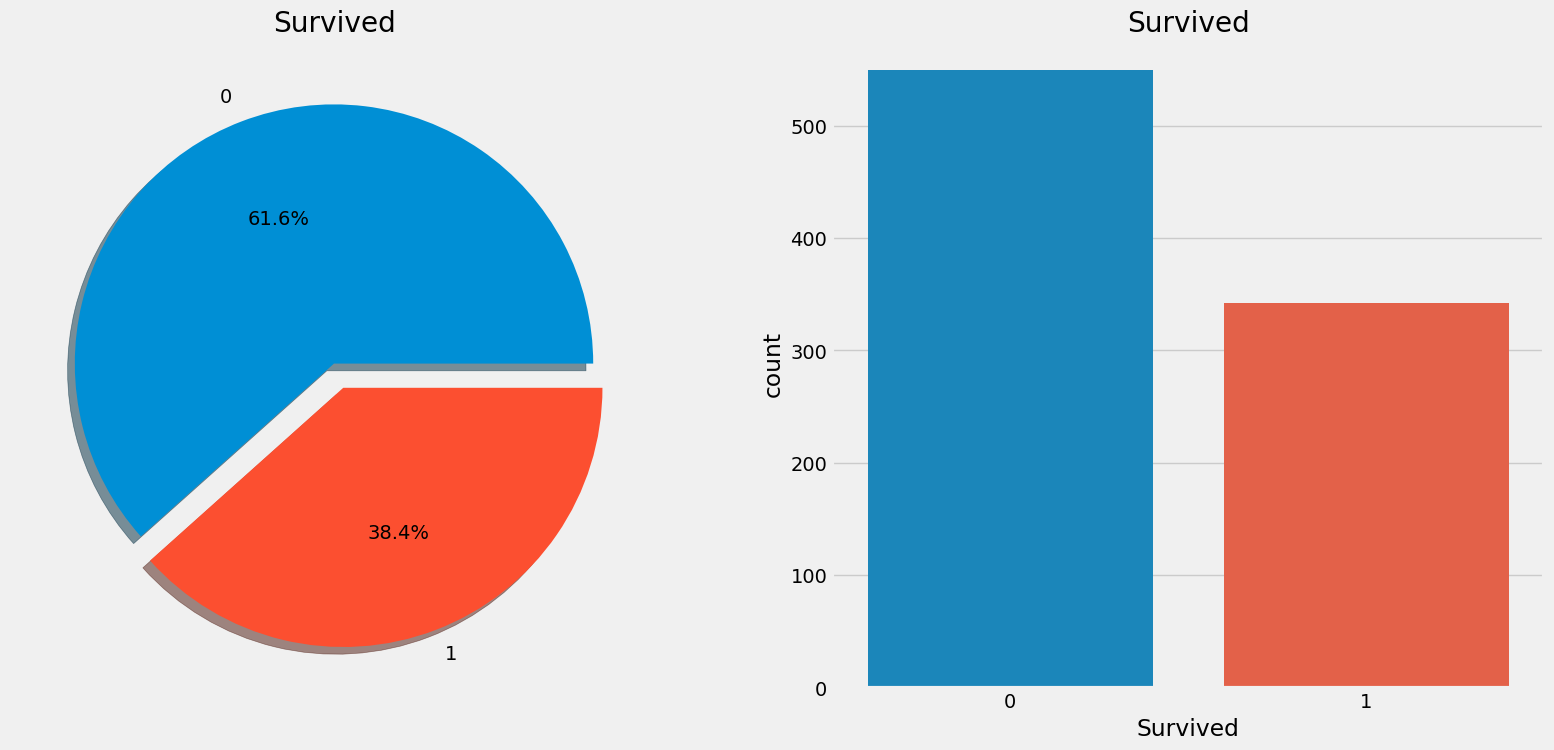

In [5]:
# How many Survived?

f, ax = plt.subplots(1,2, figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot(x='Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

- It is evident that not many passengers survived(Only 38.4%).
- We need to dig down more to get better insights to see which categories of the passengers did survive and who didn't.
- We'll see survival rates by using different features of the dataset including Sex, Age, Port of embarcation, etc.
- First let us understand the different types of features.

### Types of Features
1. Categorical : Sex, Embarked
2. Ordinal : Pclass
3. Continuous : Age
4. Discrete : Sibsp

## 1) Analysis of features

#### 1. Sex - categorical

In [6]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [7]:
data[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


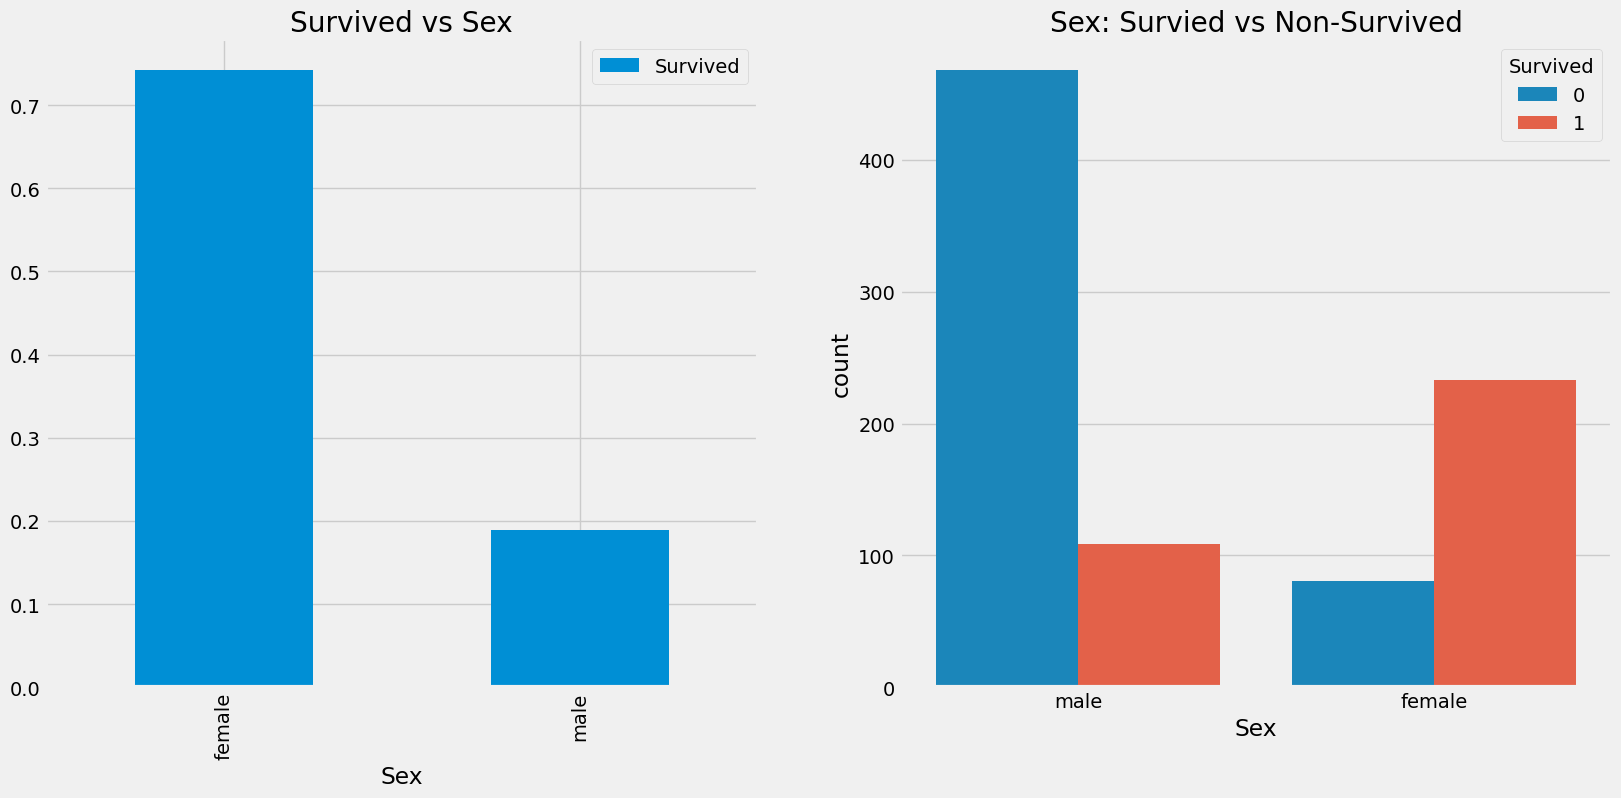

In [8]:
f, ax = plt.subplots(1,2, figsize=(18,8))

data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Survied vs Non-Survived')
plt.show()

- The survival rate for women is around 75% while that for men is around 19%
- The number of men is a lot more than that of women

#### 2. Pclass - ordinal


In [9]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


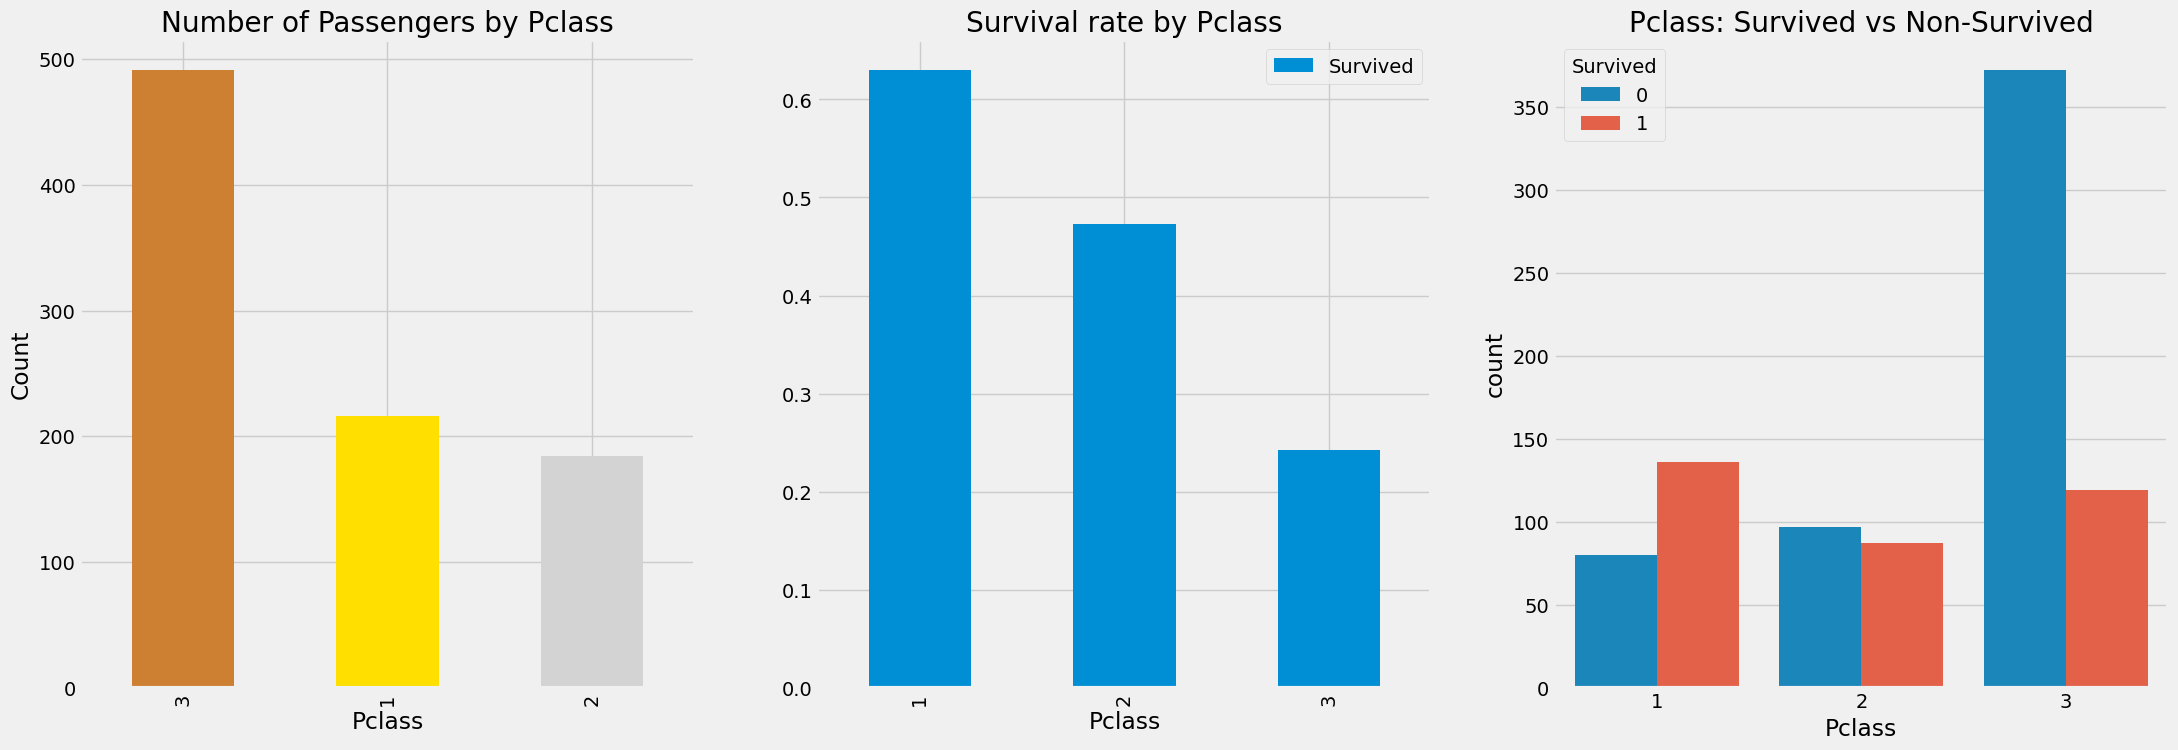

In [10]:
f, ax = plt.subplots(1,3, figsize=(24,8))

data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass')
ax[0].set_ylabel('Count')

(data[['Pclass', 'Survived']].groupby('Pclass').sum() / data[['Pclass', 'Survived']].groupby('Pclass').count()).plot.bar(ax=ax[1])
ax[1].set_title('Survival rate by Pclass')

sns.countplot(x='Pclass', hue='Survived', data=data, ax=ax[2])
ax[2].set_title('Pclass: Survived vs Non-Survived')
plt.show()

- We can clearly see that Pclass1 passengers were given a very high priority during thr rescue. 
- Even though the number of Pclass3 passengers is a lot higher, still the number of survivors is very low.
- For Pclass1 the survival rate is around 63% while for Pclass2 is around 48% and Pclass3 around 24%.
- Let's check survival rate with Sex & Pclass together.

In [11]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

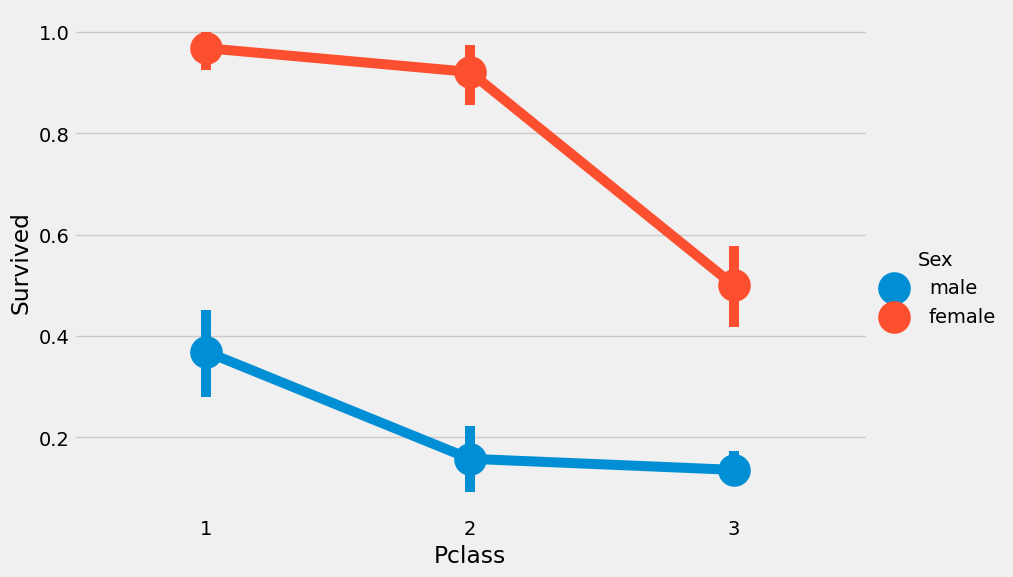

In [12]:
sns.catplot(x='Pclass', y='Survived', hue = 'Sex', kind='point', height=6, data=data, aspect=1.5)

- It is evident that irrespective of Pclass, women were given first priority during rescue. Even men from Pclass1 have a very low survival rate.
- Also it looks like Pclass is an important feature.

#### 3. Age - continuous


In [13]:
data['Age'].describe()[['min', 'max', 'mean']]

min      0.420000
max     80.000000
mean    29.699118
Name: Age, dtype: float64

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

sns.violinplot(x='Pclass',y='Age',hue='Survived',data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass&Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot(x='Sex',y='Age',hue='Survived',data=data, split=True, ax=ax[1])
ax[1].set_title('Sex&Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

- The number of children increases with Pclass and the survival rate for Age below 10 is high irrespective of the Pclass.
- Survival chance for passengers aged 20-50 of Pclass1 is high and is even better for women.
- For male, the survival chance decreases with an increase in age.

In [15]:
data['Age'].isnull().sum()

177

##### Null values of Age
- To replace 177 null values of Age, we can assign the mean value of the dataset, but there are many people with many different ages.
- We can find out what age-band the passengers lie by checking the 'Name' feature.
- Looking upon the feature, we can see that the names have a salutation like Mr of Mrs. Thus we can assign the mean values of Mr and Mrs to the repective groups.

In [16]:
data.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [18]:
data['Initial'] = 0

for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

In [19]:
data['Initial']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Initial, Length: 891, dtype: object

In [20]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


- We can replace some misspelled initials with some other values.

In [21]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [22]:
data_n = data[['Name','Initial','Age','Sex']]
data_n[data_n['Initial']=='Other']

,Name,Initial,Age,Sex
149,"Byles, Rev. Thomas Roussel Davids",Other,42.0,male
150,"Bateman, Rev. Robert James",Other,51.0,male
249,"Carter, Rev. Ernest Courtenay",Other,54.0,male
626,"Kirkland, Rev. Charles Leonard",Other,57.0,male
647,"Simonius-Blumer, Col. Oberst Alfons",Other,56.0,male
694,"Weir, Col. John",Other,60.0,male
822,"Reuchlin, Jonkheer. John George",Other,38.0,male
848,"Harper, Rev. John",Other,28.0,male
886,"Montvila, Rev. Juozas",Other,27.0,male


- Rev: a title for a priest of Christian Church, usually for men
- Col: a rank of the British Army and Royal Marines
- Jonkheer: a title of nobility in Netherlands, typically given to male member of the nobility

In [23]:
# number of members in each Initial group
data.groupby('Initial')['Initial'].count()

Initial
Master     40
Miss      186
Mr        529
Mrs       127
Other       9
Name: Initial, dtype: int64

In [24]:
# average number of Initial groups
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

##### Filling Null values of Age
- Assigning NaN values with the Ceil values of the mean ages

In [25]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'), 'Age'] = 33
data.loc[(data.Age.isnull())&(data.Initial=='Master'), 'Age'] = 5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'), 'Age'] = 22
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull())&(data.Initial=='Other'), 'Age'] = 46

In [26]:
# Now no null values left.
data['Age'].isnull().any()

False

In [27]:
data[data['Survived']==0]['Age']

0      22.0
4      35.0
5      33.0
6      54.0
7       2.0
       ... 
884    25.0
885    39.0
886    27.0
888    22.0
890    32.0
Name: Age, Length: 549, dtype: float64

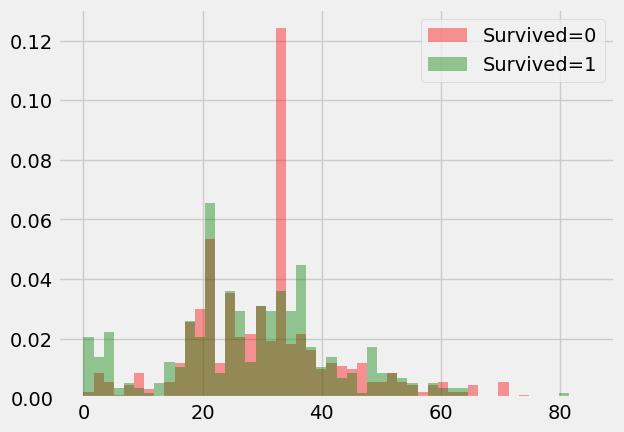

In [28]:
plt.hist(data[data['Survived']==0]['Age'], color = 'red', alpha = 0.4, bins = 50, range = [0,85], label = 'Survived=0', density = True)
plt.hist(data[data['Survived']==1]['Age'], color = 'green', alpha = 0.4, bins = 50, range = [0,85], label = 'Survived=1', density = True)
plt.legend()
plt.show()

- The toddlers(age<5) were saved in large numbers.
- The oldest was saved(80 years old).
- Maximum number of deaths were in age group of 30~40.

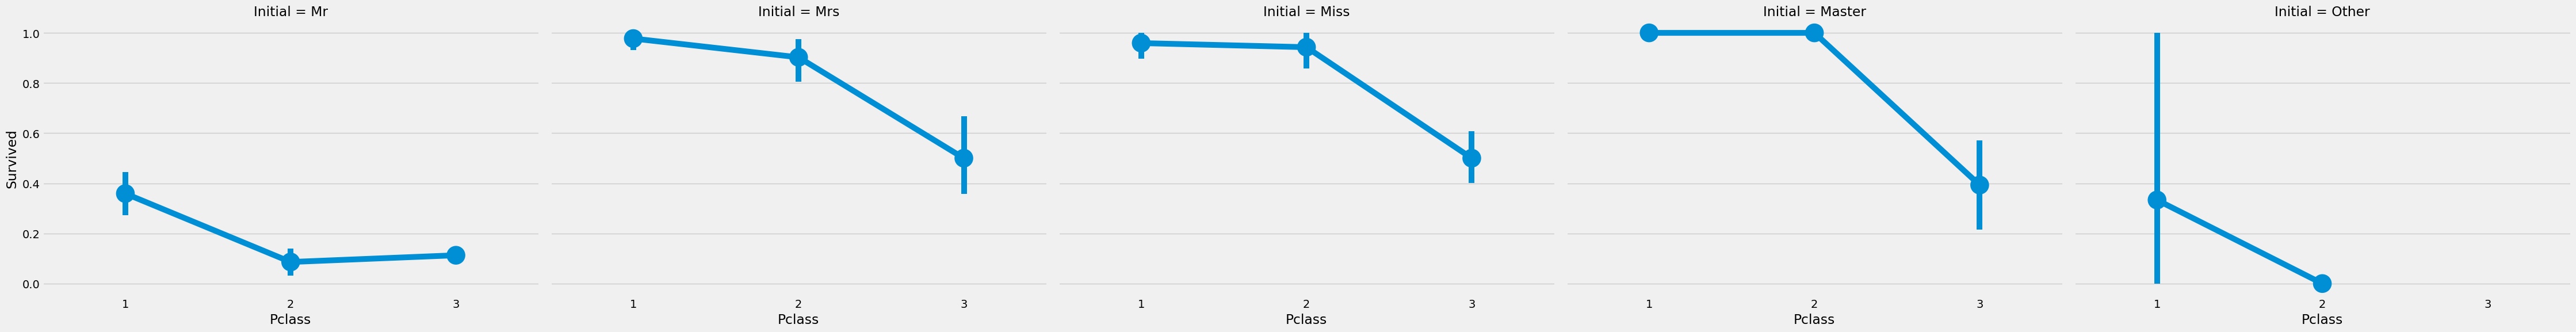

In [29]:
sns.catplot(x='Pclass', y='Survived', col = 'Initial', kind='point', height=6, data=data, aspect=1.5)

- The Women and Children first policy thus holds true irrespective of the class.

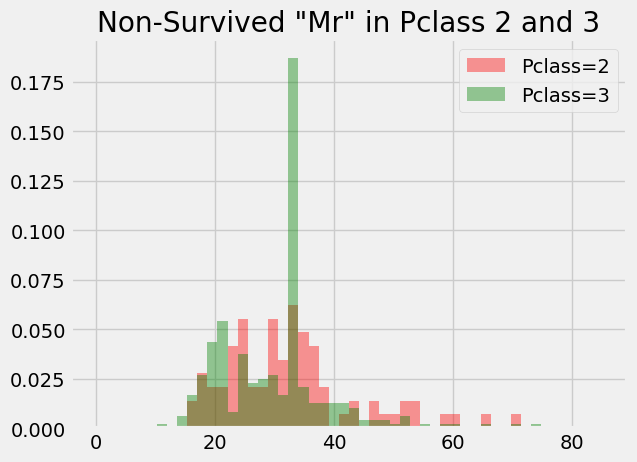

In [30]:
plt.hist(data.loc[(data['Pclass']==2) & (data['Initial']=='Mr') & (data['Survived']==0), 'Age'], color = 'red', alpha = 0.4, bins = 50, range = [0,85], label = 'Pclass=2', density = True)
plt.hist(data.loc[(data['Pclass']==3) & (data['Initial']=='Mr') & (data['Survived']==0), 'Age'], color = 'green', alpha = 0.4, bins = 50, range = [0,85], label = 'Pclass=3', density = True)
plt.title('Non-Survived "Mr" in Pclass 2 and 3')
plt.legend()
plt.show()

#### 4. Embarked - categorical

In [31]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

[]

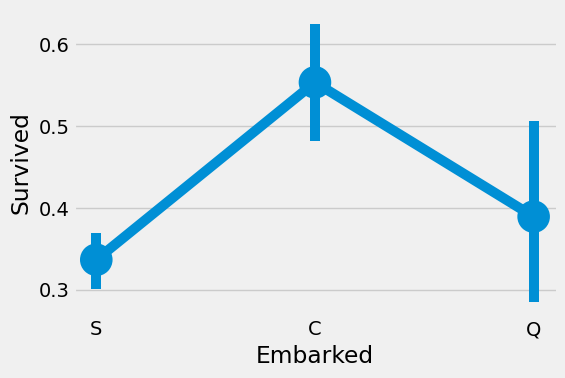

In [32]:
sns.catplot(x='Embarked', y='Survived', kind='point', height=4, data=data, aspect=1.5)
plt.plot()

- The chance of survival for port C is the highest around 0.55 while it is lowest for S.

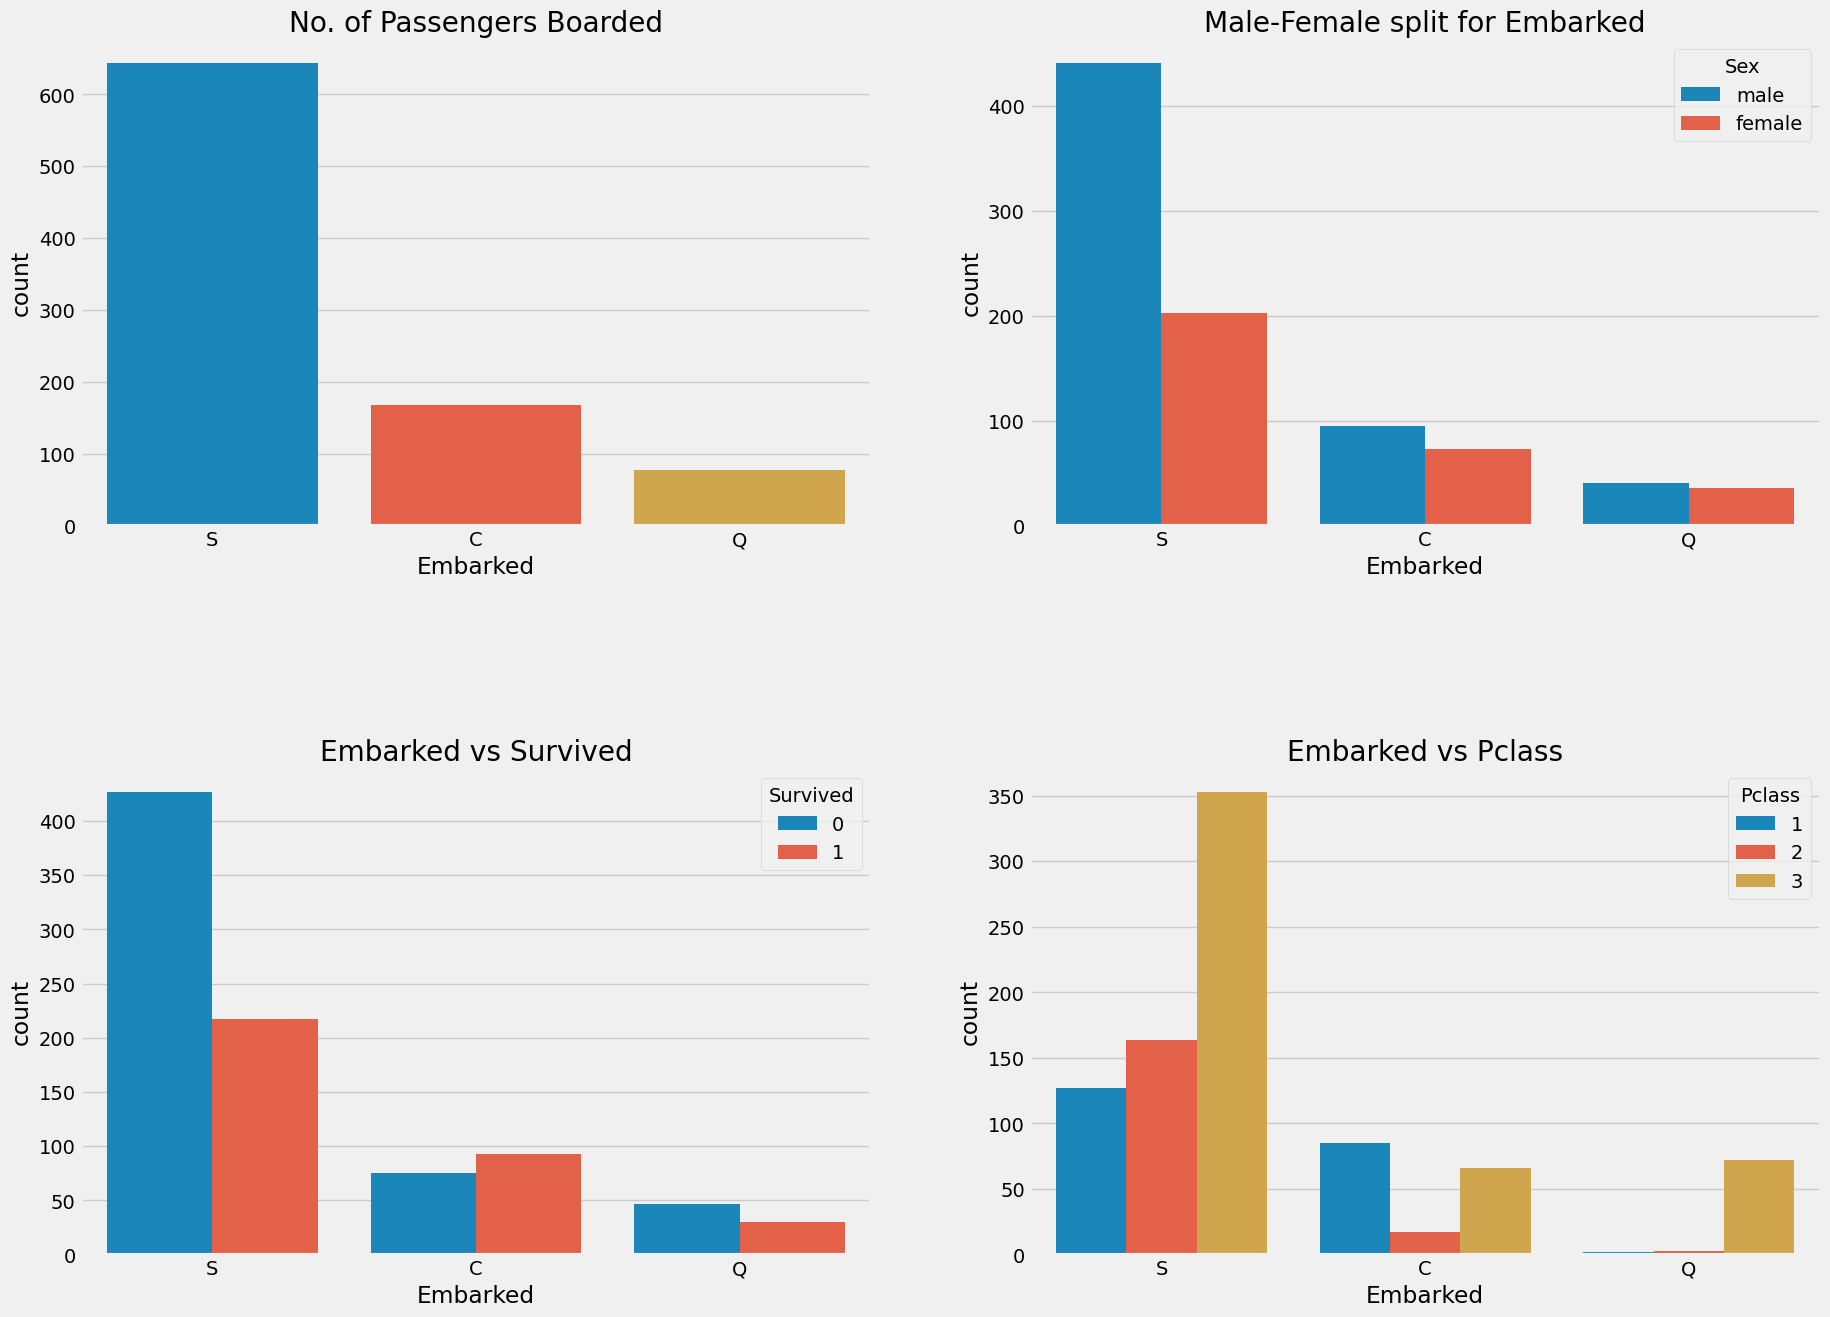

In [33]:
f, ax = plt.subplots(2, 2, figsize=(20,15))

sns.countplot(x='Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('No. of Passengers Boarded')

sns.countplot(x='Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female split for Embarked')

sns.countplot(x='Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot(x='Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Maximum number of passengers boarded from S and majority of them is from Pclass3.
- The passengers from C showed a good proportion of survival since ratio of passengers from Pclass 1 and 2 is relatively high.
- Port Q had almost 95% of the passengers from Pclass3.

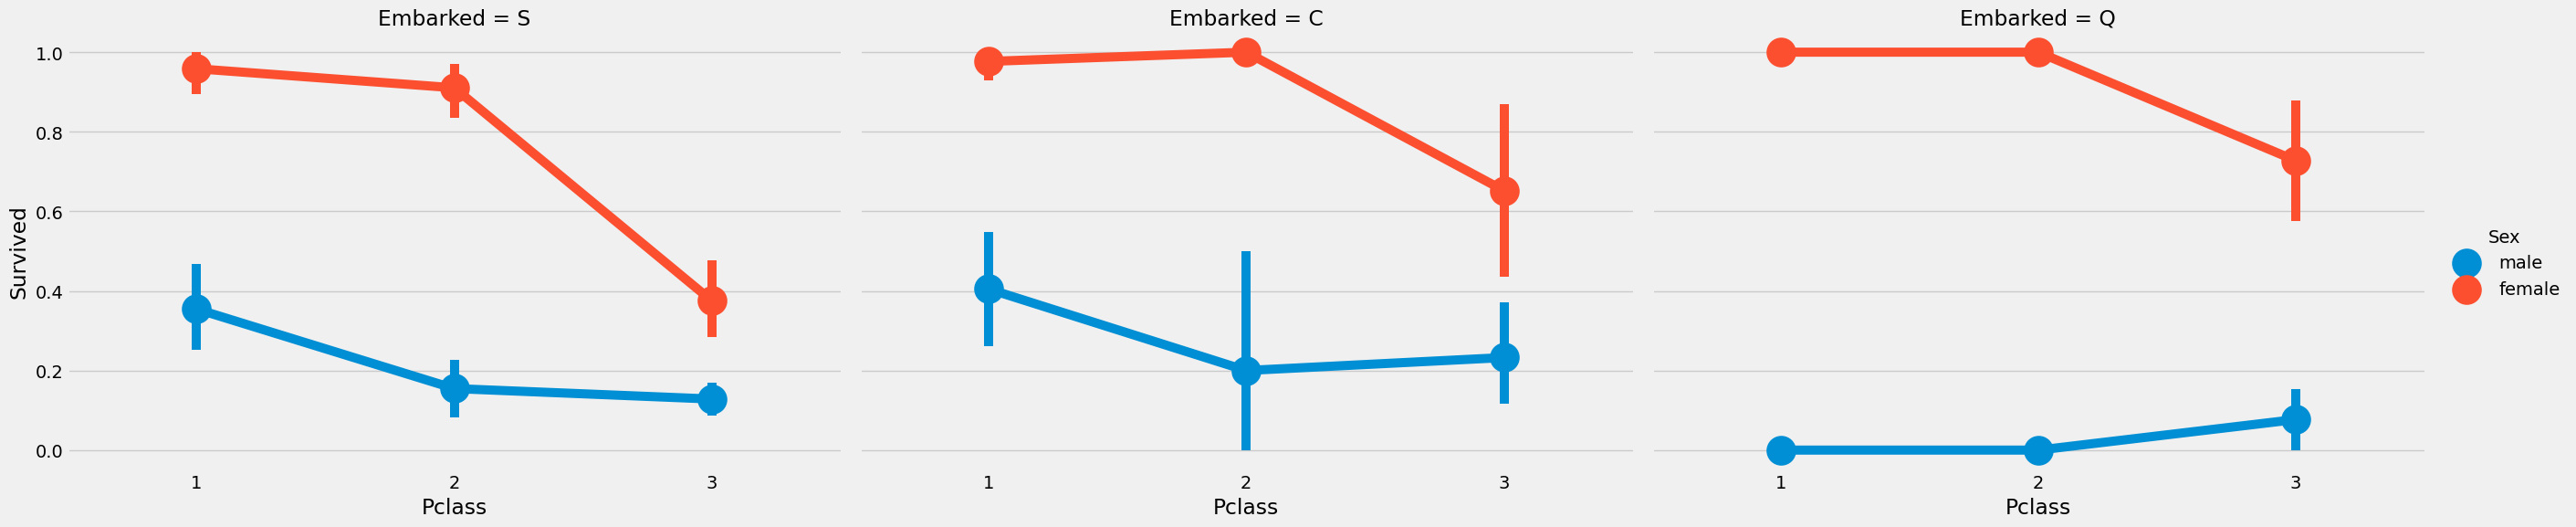

In [34]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', col = 'Embarked', kind='point', height=6, data=data, aspect=1.5)

- The survival chances are almost 1 for women in Pclass1 and 2 irrespective of the Port.
- Port S seems to be very unlucky for Pclass3 passengers as the survival rate for both men and women is very low.
- Port Q looks like the unluckiest for men, as almost all were from Pclass3.

##### Filling Null values of Embarked
- As we can see, maximum number of passengers boarded from Port S so we replace NaN with S.

In [35]:
data['Embarked'].isnull().sum()

2

In [36]:
data.groupby(['Embarked'])['Embarked'].count() / len(data['Embarked'])

Embarked
C    0.188552
Q    0.086420
S    0.722783
Name: Embarked, dtype: float64

In [37]:
data['Embarked'].fillna('S', inplace=True)

In [38]:
data['Embarked'].isnull().any()

False

#### 5. SibSp - discrete
- This feature represents whether a person is alone or with one's family members.
    - Sibling = brother, sister, stepbrother, stepsister
    - Spouse = husband, wife

In [39]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


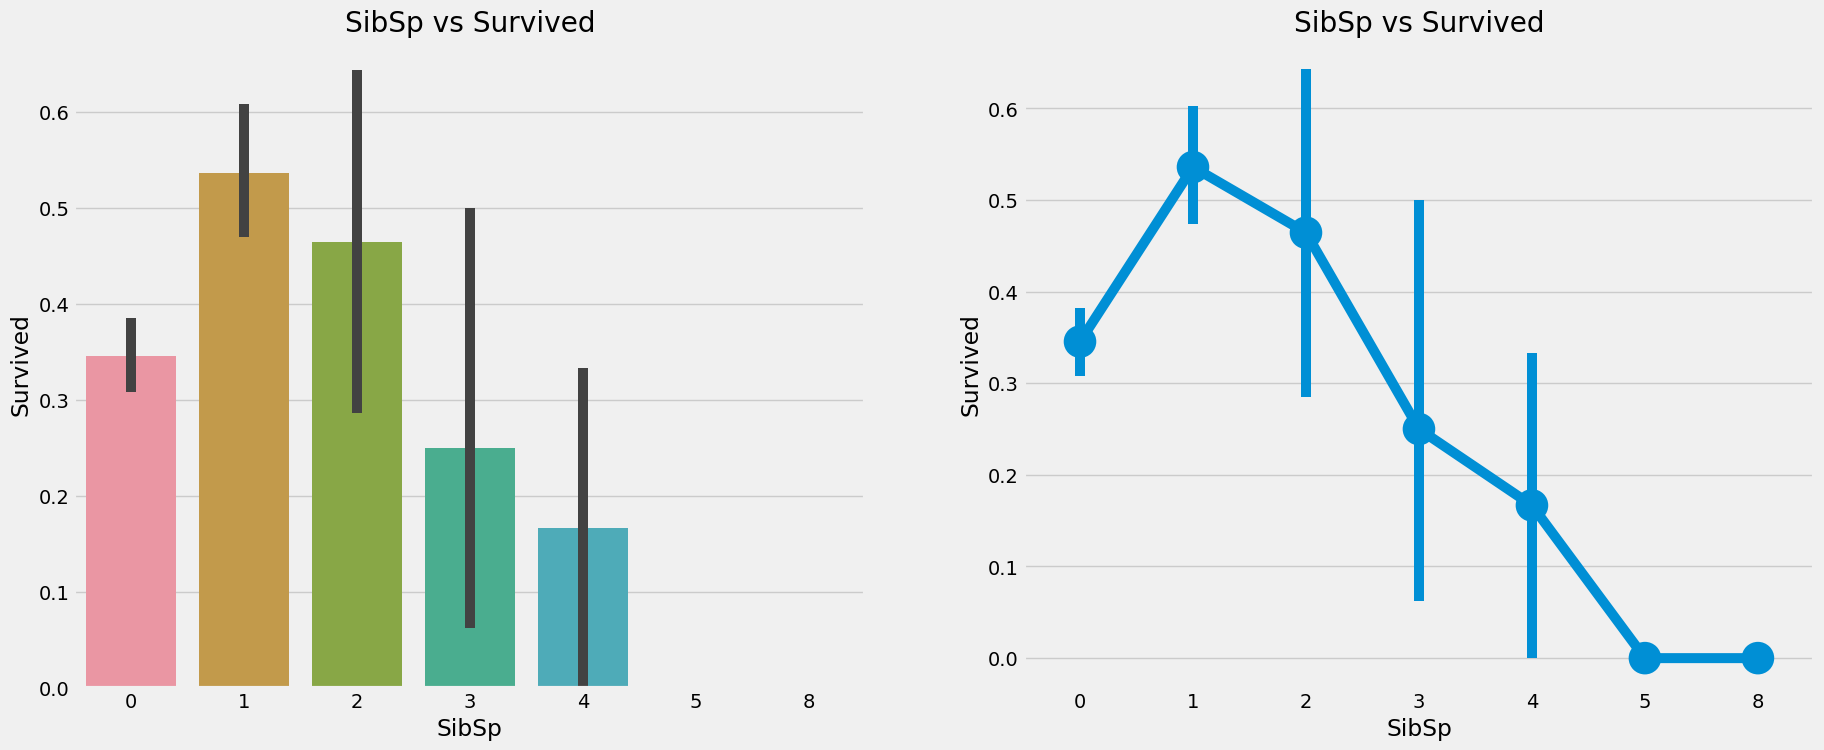

In [40]:
f, ax = plt.subplots(1,2, figsize=(20,8))

sns.barplot(x='SibSp', y='Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.pointplot(x='SibSp', y='Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')

plt.close(2)
plt.show()

In [41]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


- Plots above show that a passenger with no sibling or spouse had survival rate of 34.5%.
- The survival rate of passengers with 1 sibling of spouse was the hightest, and graph roughly decreases when the number of SibSp increases. That is, if you have any family member on board, you'll try to save them instead of saving yourself first.
- The survival rate for families with 5~8 members is 0%, as they were all from Pclass3.

#### 6. Parch - discrete
- This feature represents whether a person with one's parents or children or not.

In [42]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


- This crosstab again shows that large families were in Pclass 3.

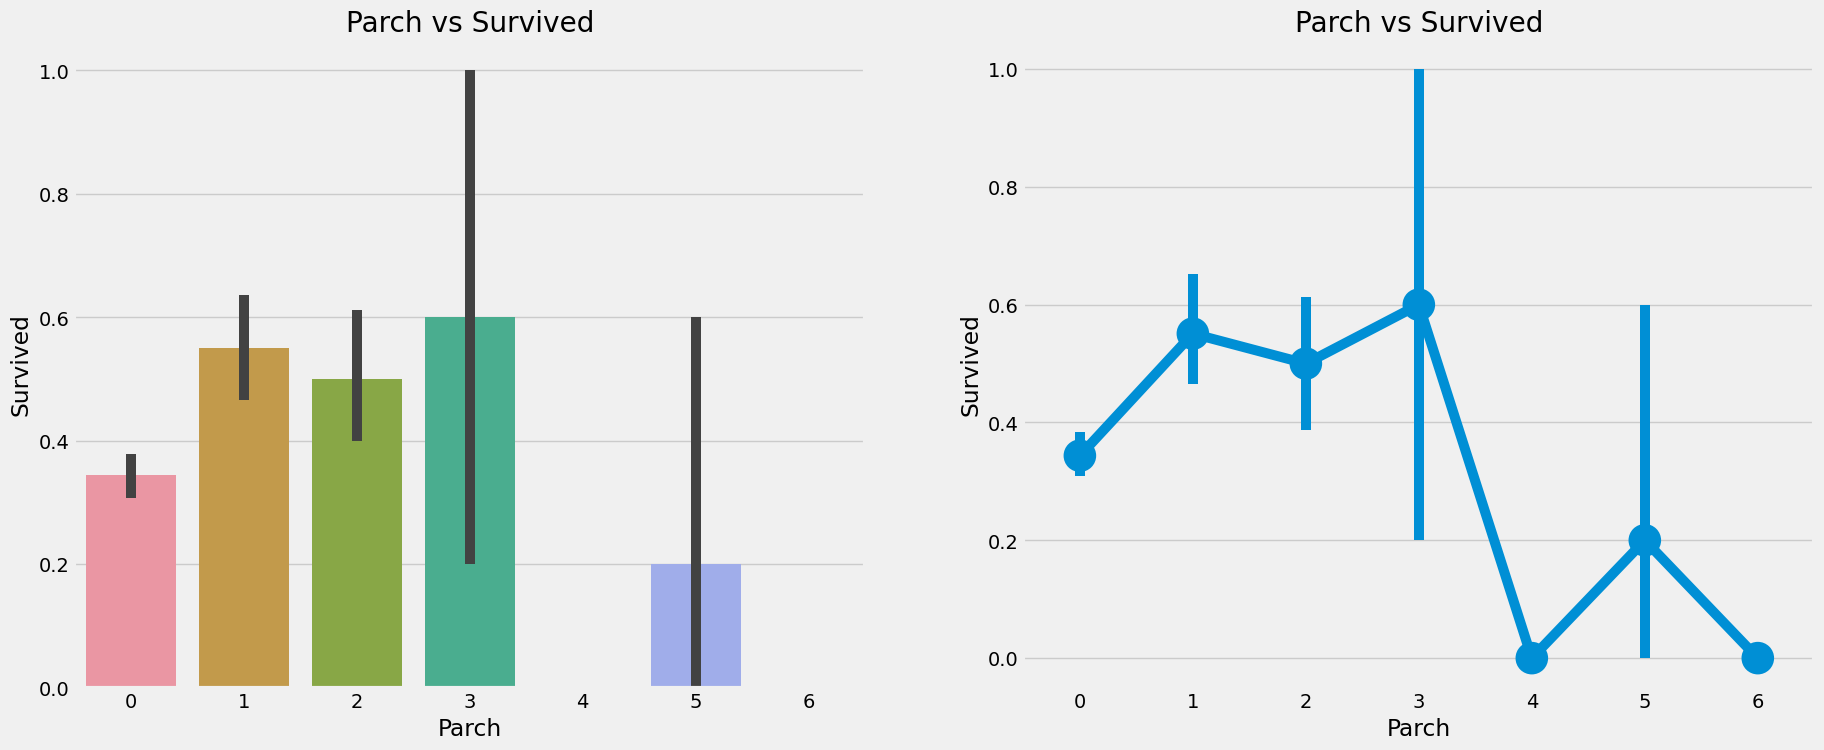

In [43]:
f, ax = plt.subplots(1,2, figsize=(20,8))

sns.barplot(x='Parch', y='Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.pointplot(x='Parch', y='Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')

plt.close(2)
plt.show()

- The result is quite similar to SibSp's result. Passengers with 1~3 parents or children had greater chance of survival and it reduces as the number goes up.
- Having more than 4 parents or children proves to be fatal.

#### 7. Fare - continuous


In [44]:
data['Fare'].describe()[['max', 'min', 'mean']]

max     512.329200
min       0.000000
mean     32.204208
Name: Fare, dtype: float64

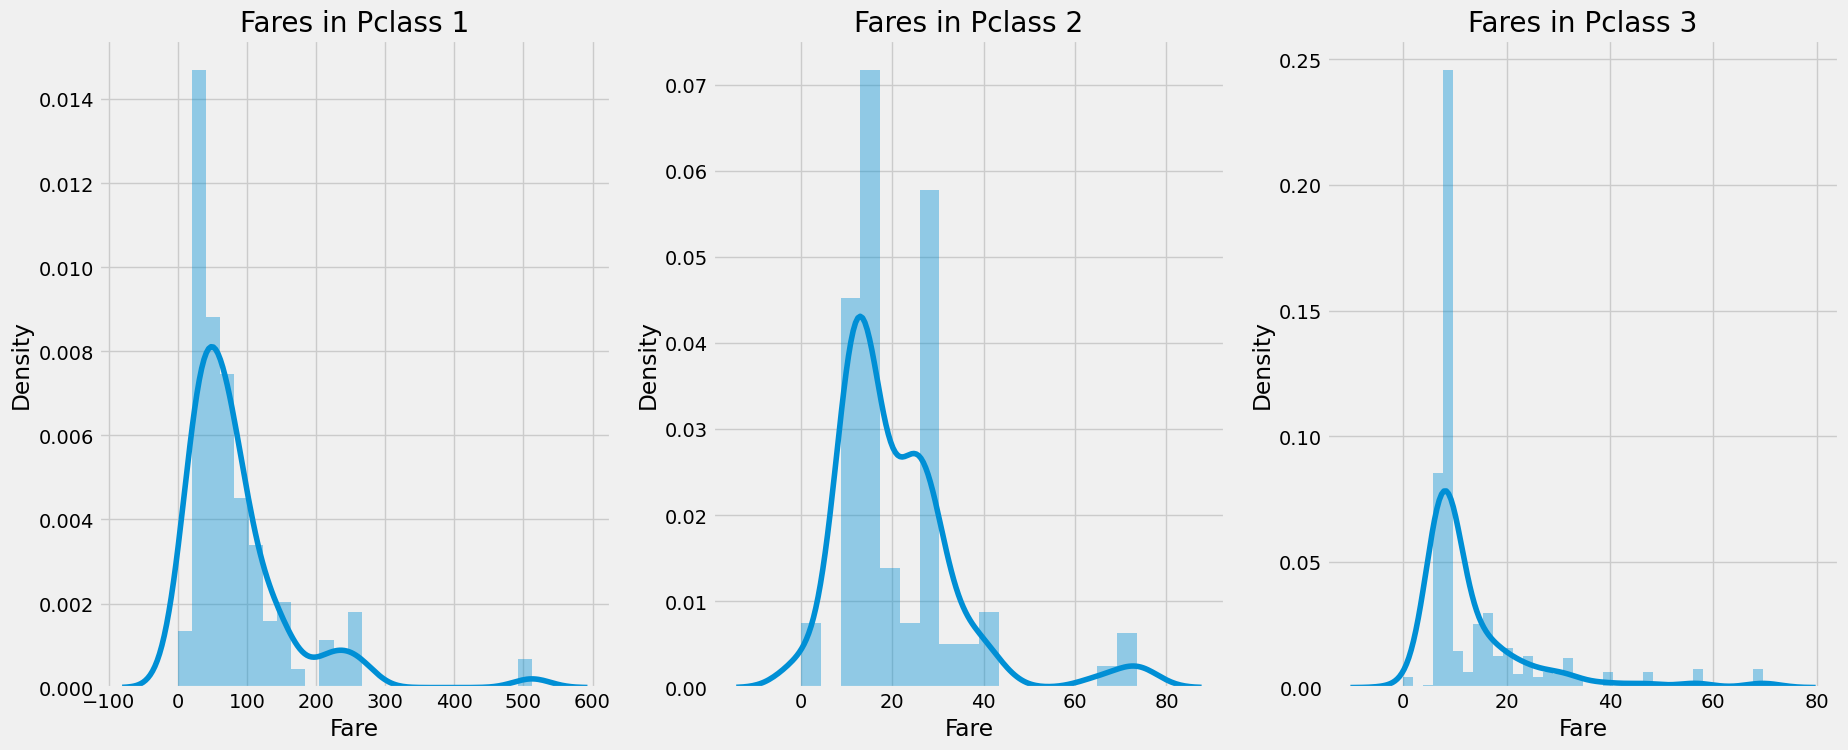

In [45]:
f, ax = plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

- We can convert this into discrete values using binning.

### Observations in an nutshell for all features...
- Sex: The chance of survival for women is high as compared to men
- Pclass: The chance of survival for Pclass 1 is high and one for Pclass 3 is low. For women, the chance of survival for Pclass 1 and 2 is very high.
- Age: Children less than 5 ~ 10 years do have a high chance of survival. Passengers between age group 15 ~ 35 died a lot.
- Embarked: The chance of survival at C seems better even though the majority of Pclass1 got up at S. Passengers at Q were almost all from Pclass3.
- Parch + SibSp: Having 1 ~ 2 SibSp or 1 ~ 3 Parch shows a greater chance of survival than being alone or having a large family travelling with you.

## 2) Finding any relations or trends considering multiple features

#### Correlation between the features

In [46]:
data[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.041709,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.091497,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339582,0.083081,0.018443,-0.549500
Age,0.041709,-0.091497,-0.339582,1.000000,-0.267734,-0.198712,0.089087
SibSp,-0.057527,-0.035322,0.083081,-0.267734,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.198712,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.089087,0.159651,0.216225,1.000000


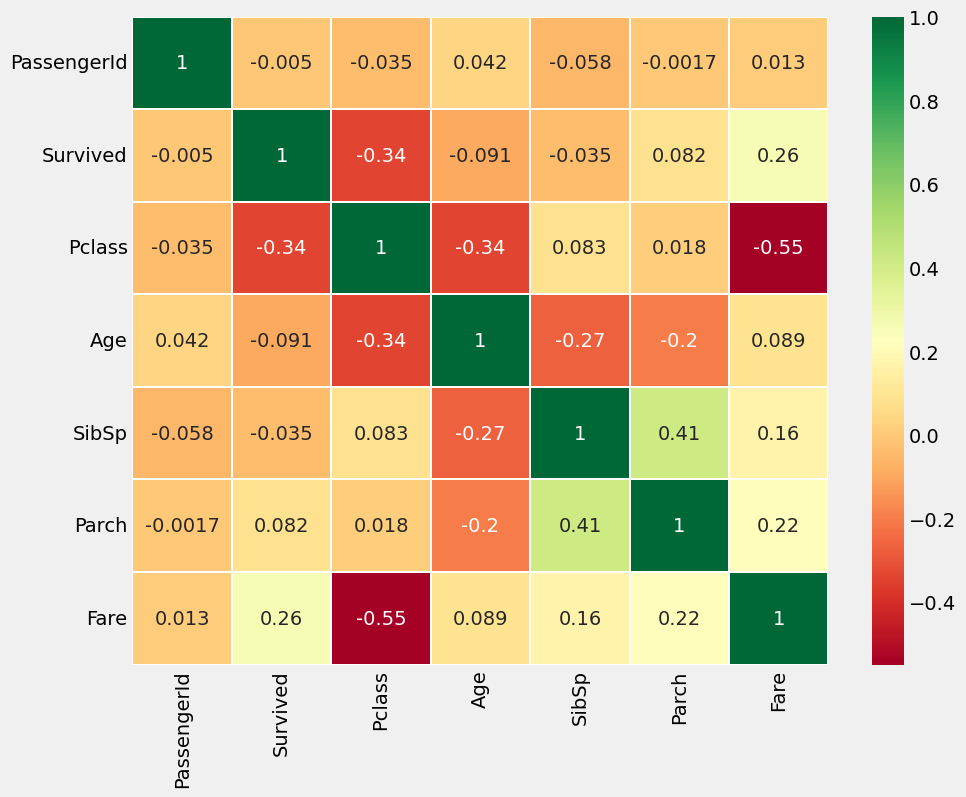

In [47]:
sns.heatmap(data[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

- Lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as MultiColinearity as both of them contains almost the same information.

- So do you think we should use both of them as one of them is redundant. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

- Now from the above heatmap,we can see that the features are not much correlated. The highest correlation is between SibSp and Parch i.e 0.41. So we can carry on with all features.

# Part2. Feature Engineering & Data Cleaning
- Not every feature is necessarily important. There may be redundant features to eliminate, or new features to add by observing or extracting information from other features.
- Also we'll transform existing features to suitable form for Predictive Modeling.

## 1) Adding any new features

#### Age_band
- Problem with Age feature:
    - It is problematic that continuous features are segregated into too many groups.
    - We need to convert them into categorical values by either Binning or Normalization.
    - Maximum age of a passenger was 80 so let's dividd the range from 0 ~ 80 into 5 bins(bins of size 16).

In [48]:
data['Age_band'] = 0
data.loc[data['Age']<=16, 'Age_band'] = 0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band'] = 1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band'] = 2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band'] = 3
data.loc[(data['Age']>64)&(data['Age']<=80),'Age_band'] = 4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [49]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,count
Age_band,
1,382
2,325
0,104
3,69
4,11


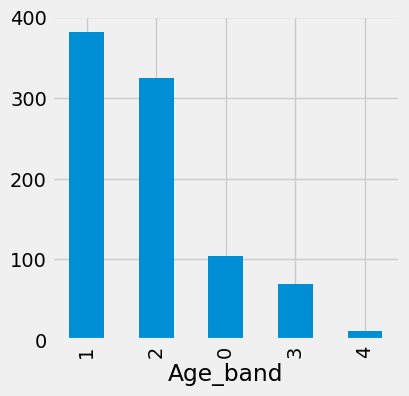

In [50]:
plt.figure(figsize=(4,4))
data['Age_band'].value_counts().plot.bar()
plt.show()

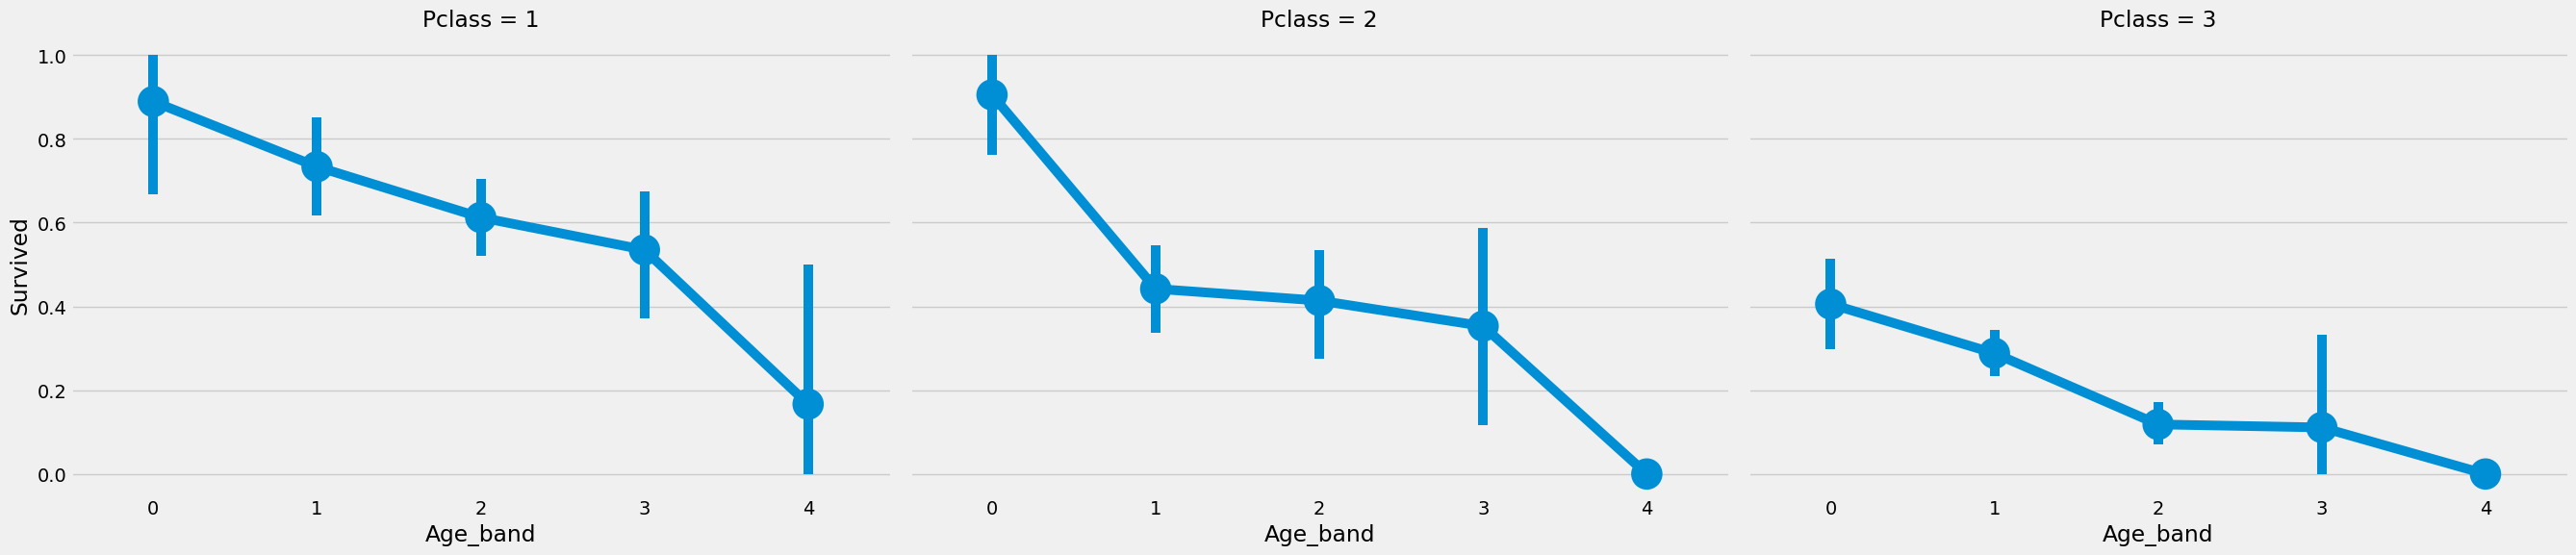

In [51]:
sns.catplot(x='Age_band', y='Survived', col='Pclass', kind='point', height=6, data=data, aspect=1.5)

- The survival rate decreases as the age increases irrespective of the Pclass.

#### Family_Size and Alone
- Family_Size: A summation of Parch and SibSp that can help us check if survival rate has anything to do with the family size.
- Alone: If a passenger was alone or not

In [52]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch']+data['SibSp']
data['Alone'] = 0
data.loc[data.Family_Size==0, 'Alone'] = 1

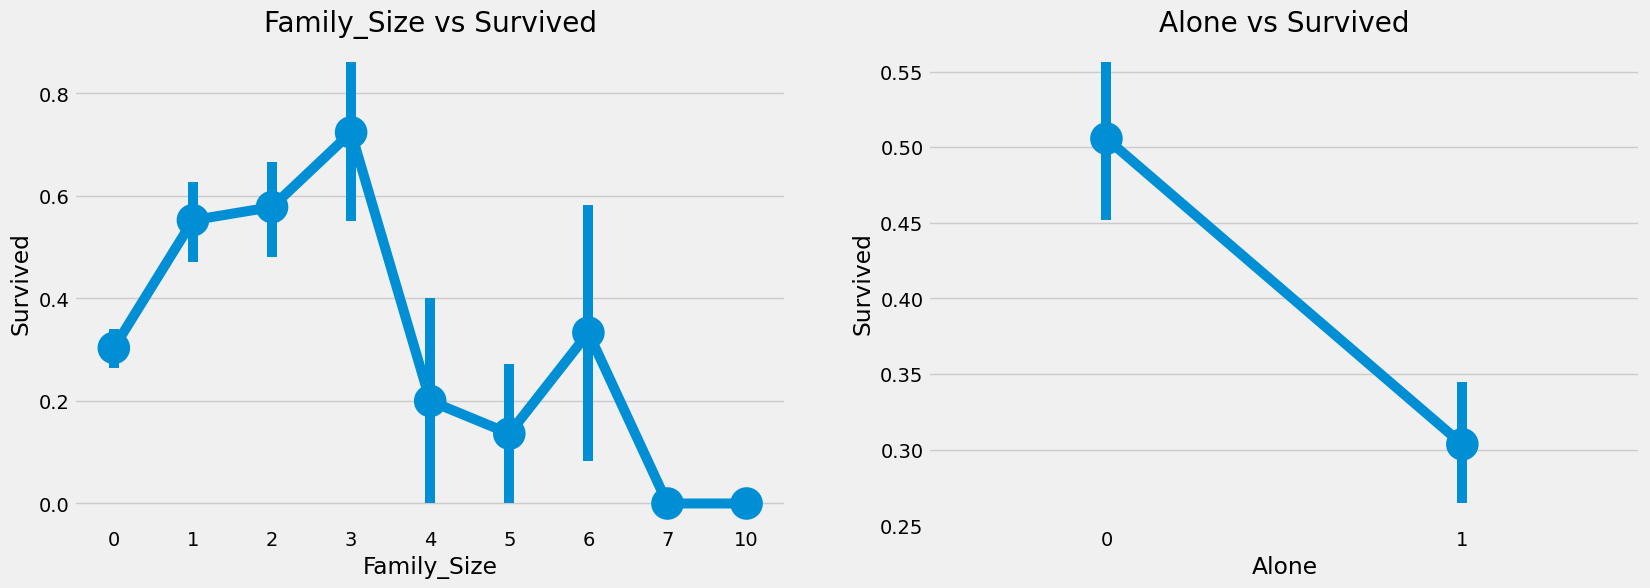

In [53]:
f, ax = plt.subplots(1,2, figsize=(18,6))
sns.pointplot(x='Family_Size', y='Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.pointplot(x='Alone', y='Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

- Family_Size=0 means that the passenger is alone. Clearly, if you are alone, the chance for survival is very low.
- Also for family size bigger than 4, the chance decreases too.

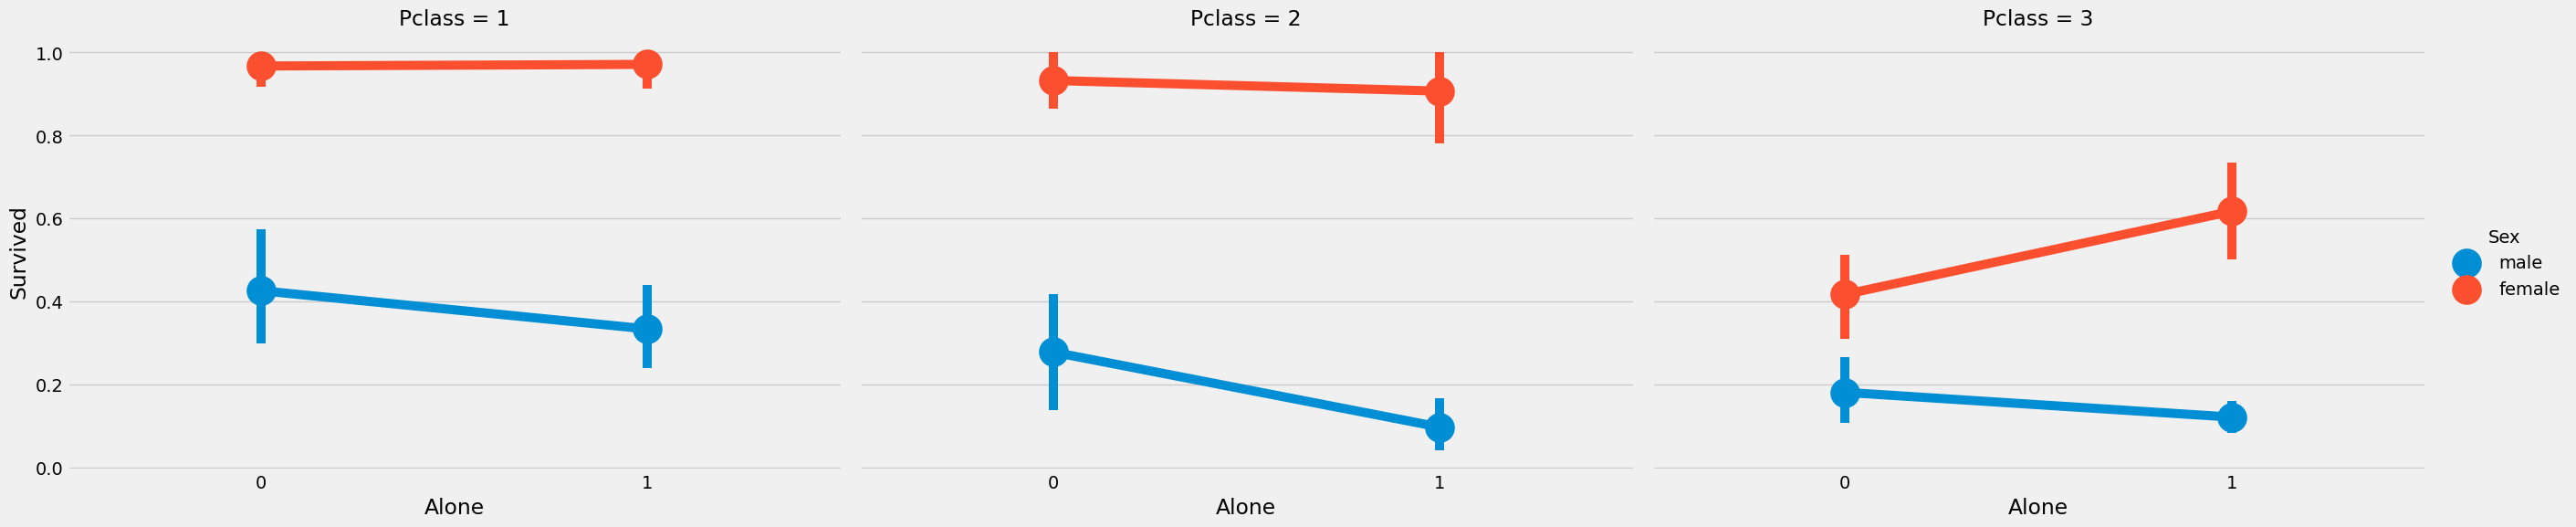

In [54]:
sns.catplot(x='Alone', y='Survived', hue='Sex', col = 'Pclass', kind='point', height=6, data=data, aspect=1.5)

- It is visible that being alone is harmful irrespective of Sex or Pclass except for Pclass3 where the survival chance of female who are alone is higher than those with family.

#### Fare_Range
- Since fare is also a continuous feature, we need to convert it into ordinal value by using pandas.qcut(the difference is, age_band used absolute interval and fare_range used relative interval).
- Then, we have to convert the ranges into singleton values same as Age_Band

In [55]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [56]:
data['Fare_Range']

0       (-0.001, 7.91]
1      (31.0, 512.329]
2       (7.91, 14.454]
3      (31.0, 512.329]
4       (7.91, 14.454]
            ...       
886     (7.91, 14.454]
887     (14.454, 31.0]
888     (14.454, 31.0]
889     (14.454, 31.0]
890     (-0.001, 7.91]
Name: Fare_Range, Length: 891, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

In [57]:
data['Fare_cat'] = 0
data.loc[data['Fare']<=7.91, 'Fare_cat'] = 0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat'] = 1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31.0),'Fare_cat'] = 2
data.loc[(data['Fare']>31.0)&(data['Fare']<=512.329),'Fare_cat'] = 3

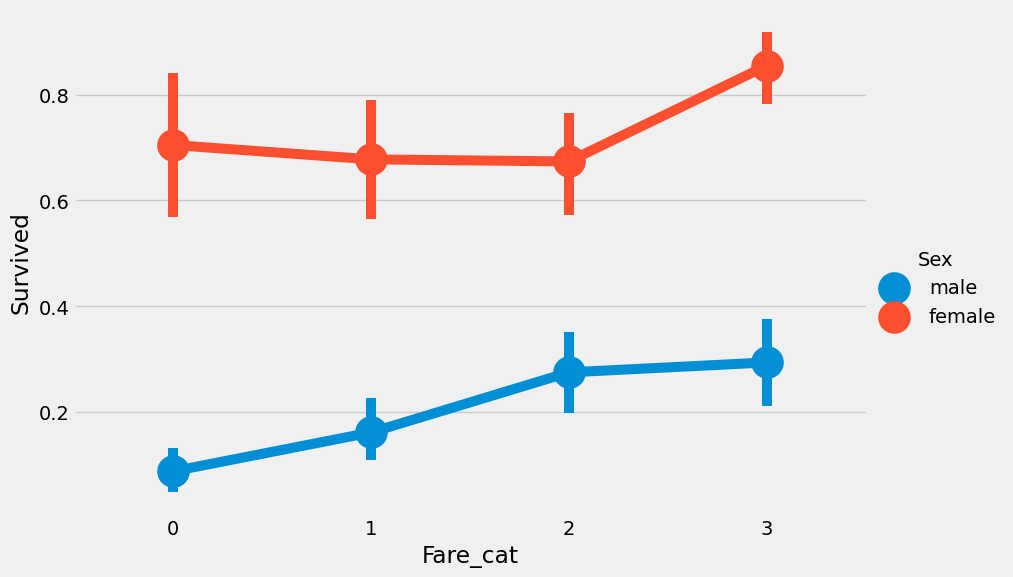

In [58]:
sns.catplot(x='Fare_cat', y='Survived', hue='Sex', kind='point', height=6, data=data, aspect=1.5)

- Clearly, as the Fare_cat increases, the survival chance increases.

## 2) Removing redundant features

#### Dropping Un-needed Features
- Name: it can't be converted into any categorical value.
- Age: we have age_band feature, so no need of this
- Ticket: it is any random string that cannot be categorized
- Fare: we have fare_cat feature, so unneeded
- Cabin: a lot of NaN values and many passengers have multiple cabins so it is a useless feature
- Fare_Range: we have the fare_cat feature
- PassengerId: cannot be categorized

In [59]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'], axis=1, inplace=True)

In [60]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Initial',
       'Age_band', 'Family_Size', 'Alone', 'Fare_cat'],
      dtype='object')

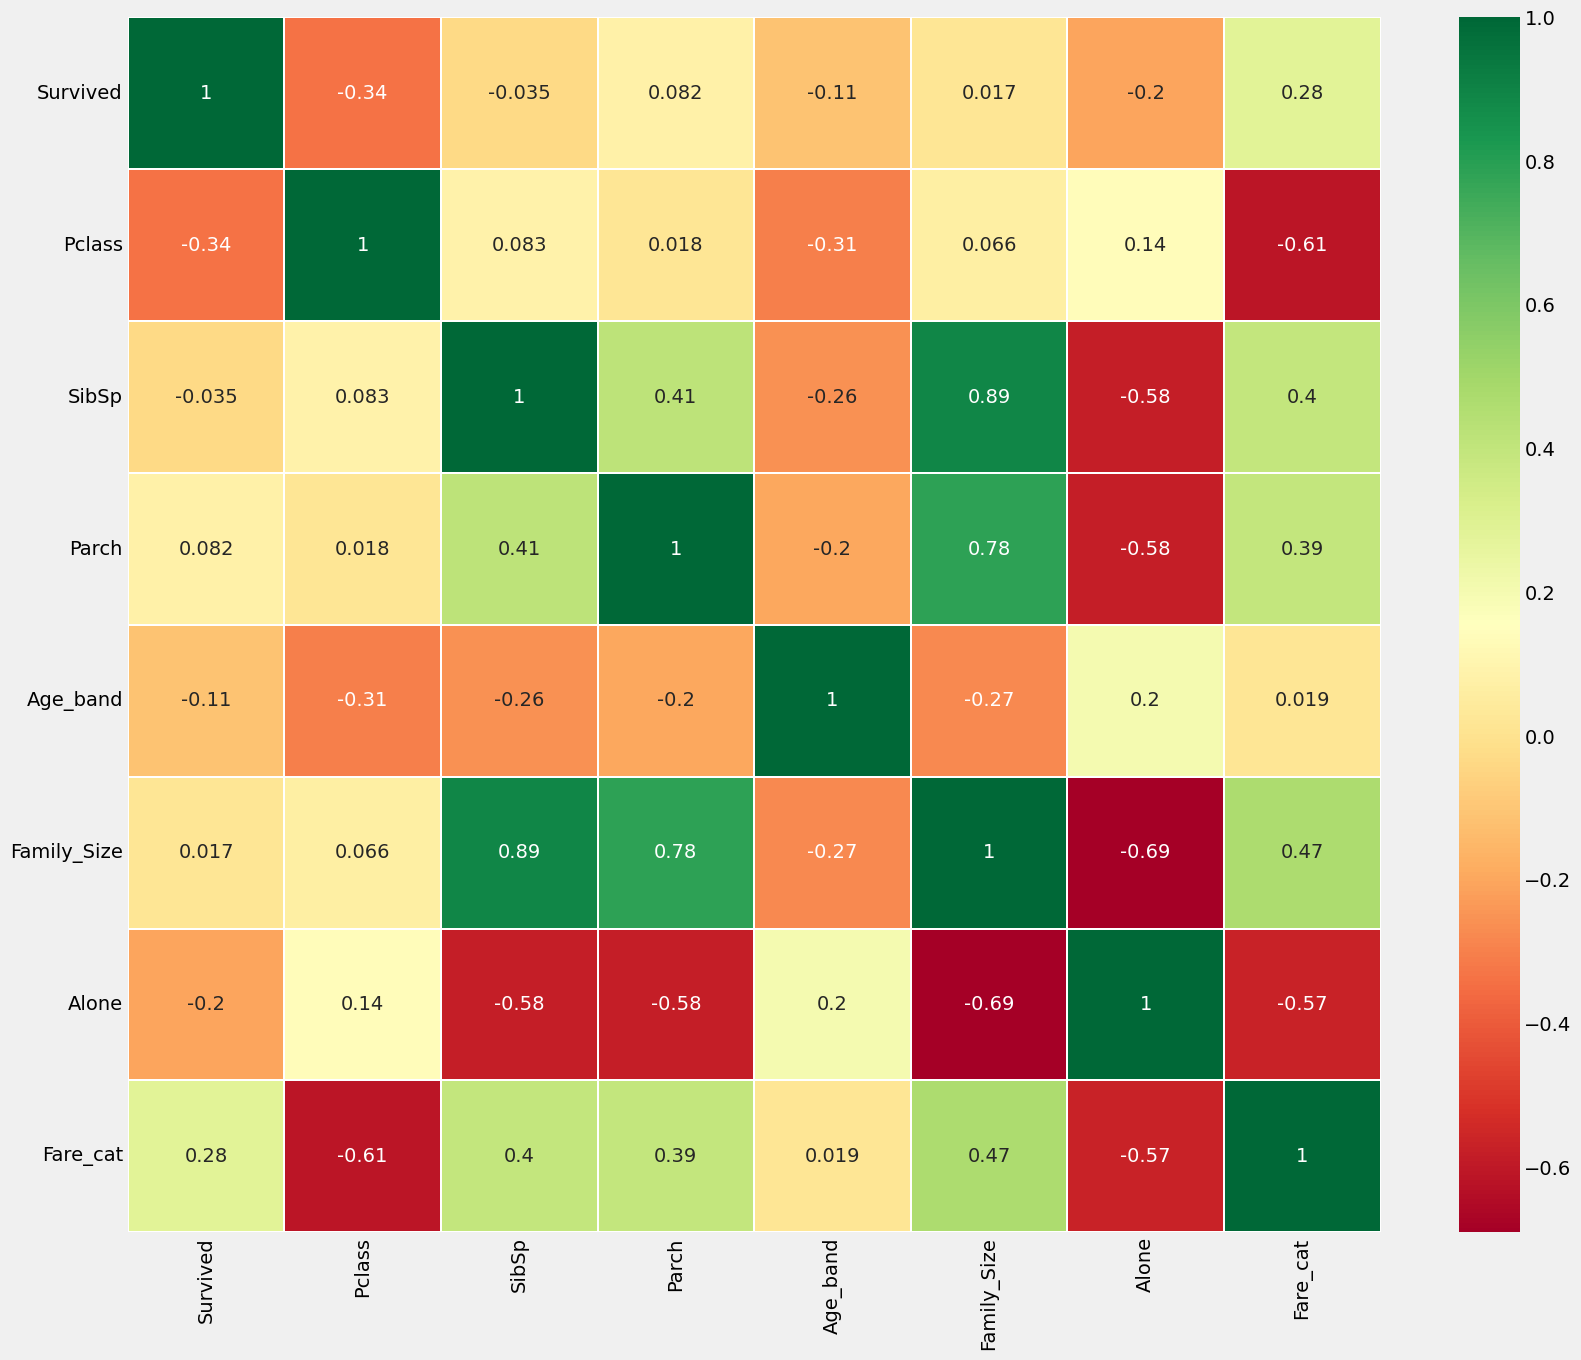

In [61]:
sns.heatmap(data[['Survived', 'Pclass', 'SibSp', 'Parch', 'Age_band', 'Family_Size', 'Alone', 'Fare_cat']].corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix

fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

- Now we can see some positively related features like SibSp, Parch and Family_Size and negative ones like Alone and Family_Size.

## 3) Converting features into suitable form for modeling

#### Converting String Values into Numeric
- Since we cannot pass strings to a machine learning model, we need to convert features like Sex, Embarked, etc into numeric values.

In [62]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

In [63]:
data.head(2)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
0,0,3,0,1,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,2,1,0,3


# Part3. Predictive Modeling
- We have gained some insights from EDA but with that, we cannot accurately predict or tell a passenger will survive or die.
- So now we'll use some great Classification Algorithms like below.
    1. Support Vector Machines(Linear and radial)
    2. Random Forest
    3. K-Nearest Neighbours
    4. Naive Bayes
    5. Decision Tree
    6. Logistic Regression


In [64]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [65]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])

train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]

X = data[data.columns[1:]]
Y = data['Survived']

## 1) Running Basic Algorithms

### Radial Support Vector Machines(rbf-SVM)

In [66]:
model = svm.SVC(kernel = 'rbf', C = 1, gamma = 0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is 0.835820895522388


### Linear Support Vector Machine(linear-SVM)

In [67]:
model = svm.SVC(kernel = 'linear', C = 0.1, gamma = 0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is 0.8171641791044776


### Logistic Regression

In [68]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('Accuracy for the Logistic Regression is', metrics.accuracy_score(prediction3, test_Y))

Accuracy for the Logistic Regression is 0.8208955223880597


### Decision Tree

In [69]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('Accuracy for the Decision Tree is', metrics.accuracy_score(prediction4, test_Y))

Accuracy for the Decision Tree is 0.8097014925373134


### K-Nearest Neighbours(KNN)

In [70]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('Accuracy for the KNN is', metrics.accuracy_score(prediction5, test_Y))

Accuracy for the KNN is 0.8134328358208955


- Now the accuracy for the KNN model changes as we change the values for n_neighbors attribute. The default value is 5. Let's check the accuracies over various values of n_neighbours.

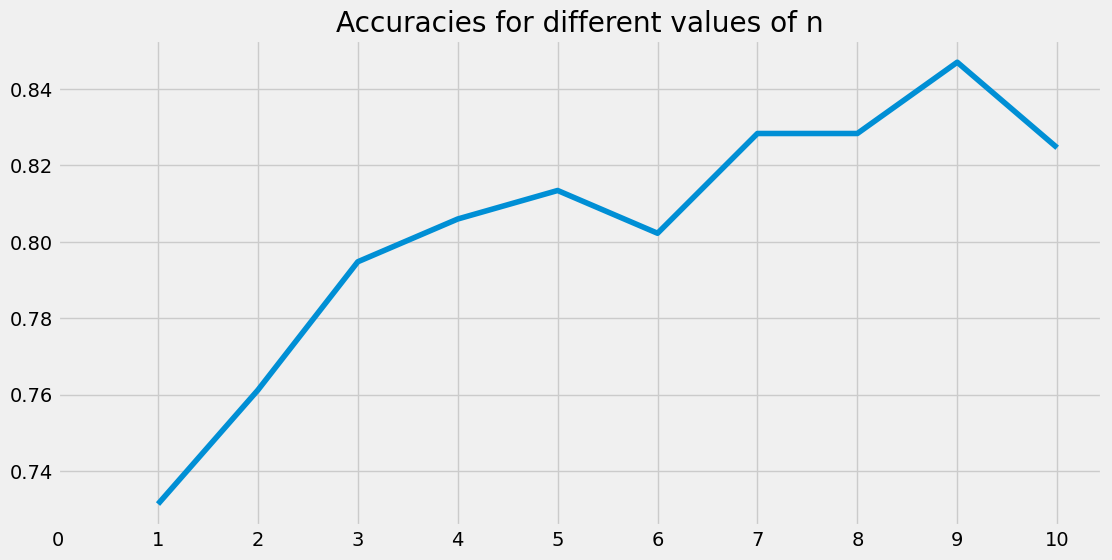

Accuracies for different values of n are: [0.73134328 0.76119403 0.79477612 0.80597015 0.81343284 0.80223881
 0.82835821 0.82835821 0.84701493 0.82462687] with the max value as  0.8470149253731343


In [71]:
a_index = list(range(1, 11))
a = pd.Series()
x = [0,1,2,3,4,5,6,7,8,9,10]

for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    a = pd.concat([a, pd.Series(metrics.accuracy_score(prediction, test_Y))])
    
plt.plot(a_index, a)
plt.xticks(x)

fig = plt.gcf()
fig.set_size_inches(12,6)
plt.title('Accuracies for different values of n')
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

### Gaussian Naive Bayes

In [72]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('Accuracy for the NaiveBayes is', metrics.accuracy_score(prediction6, test_Y))

Accuracy for the NaiveBayes is 0.8134328358208955


### Random Forests

In [73]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('Accuracy for the Random Forest is', metrics.accuracy_score(prediction7, test_Y))

Accuracy for the Random Forest is 0.8208955223880597


- The accuracy of a model is not the only factor that determines the robustness of the classifier. 
- Let's say that a classifier is trained over a training data and tested over the tested data and it scores an accuracy of 90%. Nos this seems to be very good accuracy for a classifier, but can we confirm that it will be 90% for all the new test sets that come over? The answer is No, because we can't determine which all instances will the classifier use to train itself. As the training and testing data changes, the accuracy will also change. It may increase or decrease. This is known as model variance.
- To overcome this and get a generalized model, we use Cross Validation.

## 2) Cross Validation

In [74]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [75]:
kfold = KFold(n_splits=10) # split the data into 10 equal parts
xyz = []
accuracy = []
std = []
classifier = ['Linear Svm', 'Radial Svm', 'Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']
models = [svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100)]

for i in models:
    model = i
    cv_result = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    
new_models_dataframe2 = pd.DataFrame({'CV Mean':xyz, 'Std':std}, index=classifier)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.791223,0.045646
Radial Svm,0.828290,0.034427
Logistic Regression,0.803596,0.024186
KNN,0.810424,0.045010
Decision Tree,0.813720,0.026926
Naive Bayes,0.799139,0.028757
Random Forest,0.814856,0.031579


<Axes: >

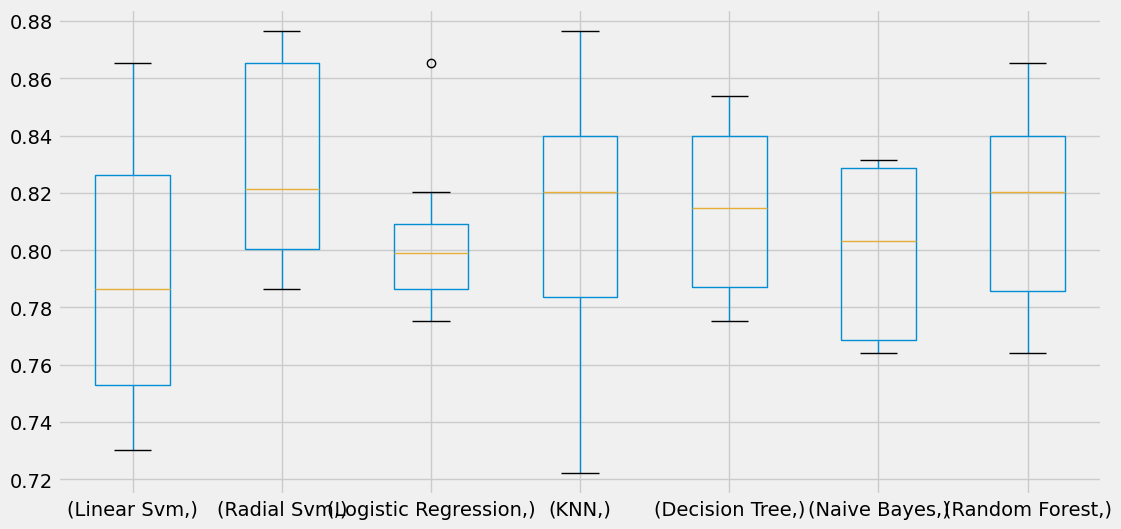

In [76]:
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy, index=[classifier])
box.T.boxplot()

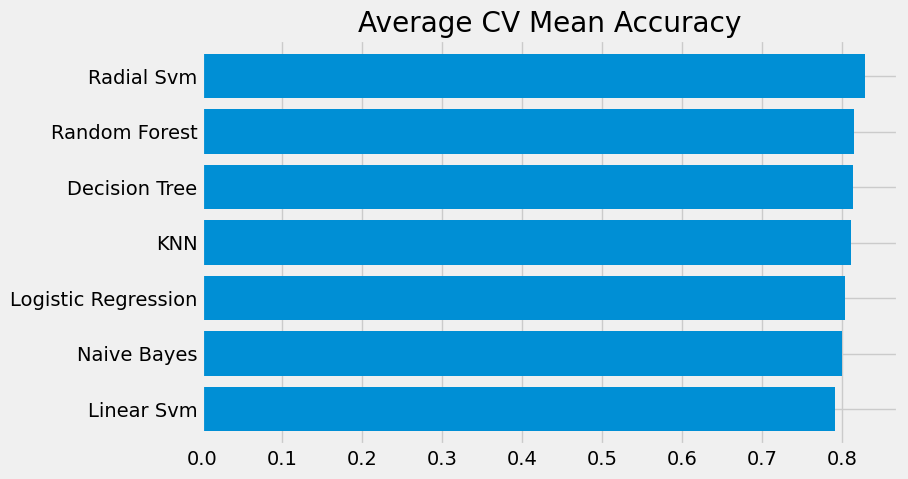

In [78]:
new_models_dataframe2['CV Mean'].sort_values().plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf() # get current figure
fig.set_size_inches(8,5)
plt.show()

### Confusion Matrix
- The classification accuracy can be sometimes misleading due to imbalance. We can get a summarized result with the help of confusion matrix, which shows where did the model go wrong, or which class did the model predict wrong.
- It gives the number of correct and incorrect classifications made by the classifier.

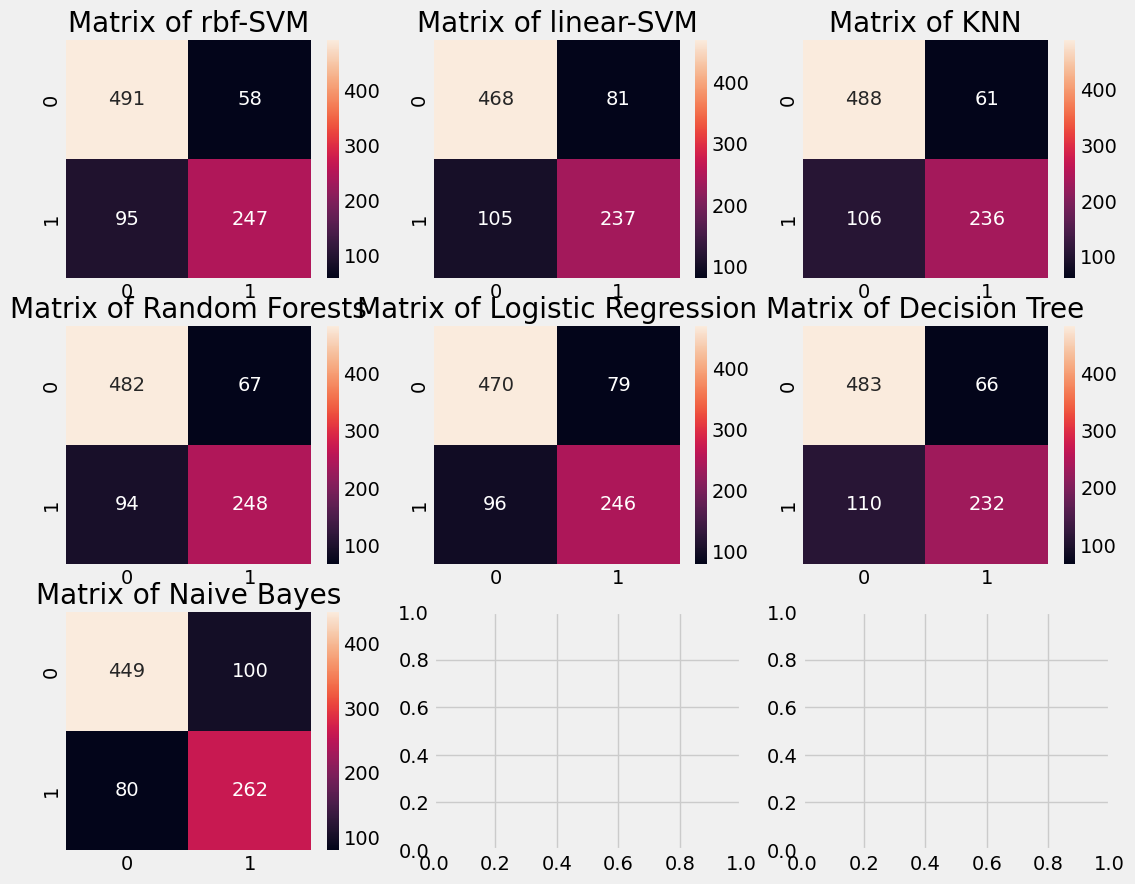

In [79]:
f, ax = plt.subplots(3, 3, figsize=(12,10))

y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,0], annot=True, fmt='2.0f')
ax[0,0].set_title('Matrix of rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,1], annot=True, fmt='2.0f')
ax[0,1].set_title('Matrix of linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,2], annot=True, fmt='2.0f')
ax[0,2].set_title('Matrix of KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,0], annot=True, fmt='2.0f')
ax[1,0].set_title('Matrix of Random Forests')

y_pred = cross_val_predict(LogisticRegression(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,1], annot=True, fmt='2.0f')
ax[1,1].set_title('Matrix of Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,2], annot=True, fmt='2.0f')
ax[1,2].set_title('Matrix of Decision Tree')

y_pred = cross_val_predict(GaussianNB(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[2,0], annot=True, fmt='2.0f')
ax[2,0].set_title('Matrix of Naive Bayes')

plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

#### Interpreting Confusion Matrix

Let's consider the first plot for rbf-SVM:
1) The number of correct predictions are 491(for dead)+247(for survived) with the mean CV accuracy being (491+247)/891 = 82.8% which we did get earlier.

2) Errors --> Wrongly classified 58 dead people as survived and 95 survived as dead.

By looking at all the metrices, we can say that rbf-SVM has a higher chance in correctly predicting dead passengers but NaiveBayes has a higher chance in predicting passengers who survived.

### Hyper-Parameters Tuning
- The machine learning models have some default parameter values called hyper-parameters which we can tune or change to get a better model.
- Hyper-Parameter Tuning is tuning there hyper-parameters to change the learning rate of the algorithm and get a better model.
- We'll tune the hyper-parameters for the 2 best classifiers i.e the SVM and RandomForests.

#### SVM

In [80]:
from sklearn.model_selection import GridSearchCV

C = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel = ['rbf', 'linear']
hyper = {'kernel':kernel, 'C': C, 'gamma':gamma}

gd = GridSearchCV(estimator = svm.SVC(), param_grid = hyper, verbose = True)
gd.fit(X,Y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.6, gamma=0.1)


#### Random Forests

In [81]:
n_estimators = range(100, 1000, 100)
hyper = {'n_estimators':n_estimators}

gd = GridSearchCV(estimator = RandomForestClassifier(random_state=0), param_grid = hyper, verbose = True)
gd.fit(X,Y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.8193208210407382
RandomForestClassifier(n_estimators=900, random_state=0)


- The best score for rbf-SVM is 82.82% with C=0.6 and gamma=0.1
- For Random Forest, score is about 81.9% with n_estimators=900

In [83]:
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.791223,0.045646
Radial Svm,0.828290,0.034427
Logistic Regression,0.803596,0.024186
KNN,0.810424,0.045010
Decision Tree,0.813720,0.026926
Naive Bayes,0.799139,0.028757
Random Forest,0.814856,0.031579


## 3) Ensembling
- Ensembling is a good way to increase the accuracy or performance of a model. In simple words, it is the combination of various simple models to create a single powerful model.
- Ensembling improves the stability of the model and it can be done in ways like voting classifier, bagging and boosting.

### 1) Voting Classifier
- It is the simplest way of combining predictions from many different simple machine learning models. It gives an average prediction result based of the prediction of all the submodels. The submodels or the basemodels are all of different types.

In [84]:
from sklearn.ensemble import VotingClassifier

ensemble_lin_rbf = VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)),
                                               ('RBF', svm.SVC(probability=True, kernel='rbf', C=0.5, gamma=0.1)),
                                               ('RFor', RandomForestClassifier(n_estimators=500, random_state=0)),
                                               ('LR', LogisticRegression(C=0.05)),
                                               ('DT', DecisionTreeClassifier(random_state=0)),
                                               ('NB', GaussianNB()),
                                               ('svm', svm.SVC(kernel='linear', probability=True))],
                                   voting='soft').fit(train_X, train_Y)

print('The accuracy for ensembled model is:', ensemble_lin_rbf.score(test_X, test_Y))
cross = cross_val_score(ensemble_lin_rbf, X, Y, cv=10, scoring='accuracy')
print('The cross validated score is', cross.mean())

The accuracy for ensembled model is: 0.8246268656716418
The cross validated score is 0.8249188514357053


### 2) Bagging
- Bagging is a general ensemble method. It works by applying similar classifiers on small partitions of the dataset and then taking the average of all the predictions.
- Due to the averaging, there is reduction in variance. Unlike Voting Classifier, Bagging makes use of similar classifiers.

#### Bagged KNN
- Bagging works best with models with high variance. An example for this can be Decision Tree or Random Forests. We can use KNN with small value of n_neighbors, as small value of n_neighbors.

In [85]:
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged KNN is:', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged KNN is', result.mean())

The accuracy for bagged KNN is: 0.8283582089552238
The cross validated score for bagged KNN is 0.8115480649188515


#### Bagged Decision Tree

In [86]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0, n_estimators=100)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged Decision Tree is:', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged Decision Tree is', result.mean())

The accuracy for bagged Decision Tree is: 0.832089552238806
The cross validated score for bagged Decision Tree is 0.8160174781523096


### 3) Boosting
- Boosting is an ensembling technique which uses sequential learning of classifiers. It is a step by step enhancement of a weak model. Boosting works as follows:
- A model is first trained on the complete dataset. Then the model will get some instances right while some wrong. Now in the next iteration, the learner will focus more on the wrongly predicted instances or give more weight to it. Thus it will try to predict the wrong instance correctly. Now this iterative process contiues and new classifiers are added to the model until the limit is reached on the accuracy.

#### AdaBoost (Adaptive Boosting)
- The weak learner or estimator in this case is a Decision Tree. But we can change the default base_estimator to any algorithm of our choice.

In [87]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result = cross_val_score(ada, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for AdaBoost is:', result.mean())

The cross validated score for AdaBoost is: 0.8271660424469414


#### Stochastic Gradient Boosting
- Here too the weak learner is a Decision Tree.

In [88]:
from sklearn.ensemble import GradientBoostingClassifier

grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result = cross_val_score(grad, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for Gradient Boosting is:', result.mean())

The cross validated score for Gradient Boosting is: 0.8137827715355804


#### XGBoost

In [89]:
import xgboost as xg

xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
result = cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for XGBoost is:', result.mean())

The cross validated score for XGBoost is: 0.8182771535580524


- We got the highest accuracy for AdaBoost. We'll try to increase it with Hyper-Parameter Tuning

#### Hyper-Parameter Tuning for AdaBoost

In [90]:
n_estimators = list(range(100, 1100, 100))

learn_rate = [0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper = {'n_estimators':n_estimators, 'learning_rate':learn_rate}
gd = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8271483271608814
AdaBoostClassifier(learning_rate=0.05, n_estimators=300)


In [96]:
# Hyper-Parameter Tuning for XGBoost

n_estimators = list(range(100, 1100, 100))

learn_rate = [0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper = {'n_estimators':n_estimators, 'learning_rate':learn_rate}
gd = GridSearchCV(estimator=xg.XGBClassifier(), param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8215554579122465
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [98]:
# Hyper-Parameter Tuning for Gradient Boosting

n_estimators = list(range(100, 1100, 100))

learn_rate = [0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper = {'n_estimators':n_estimators, 'learning_rate':learn_rate}
gd = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8215868432615654
GradientBoostingClassifier(learning_rate=1)


- The maximum accuracy we can get with AdaBoost is 83% with n_estimators= and learning_rate=

### Confusion Matrix for the Best Model

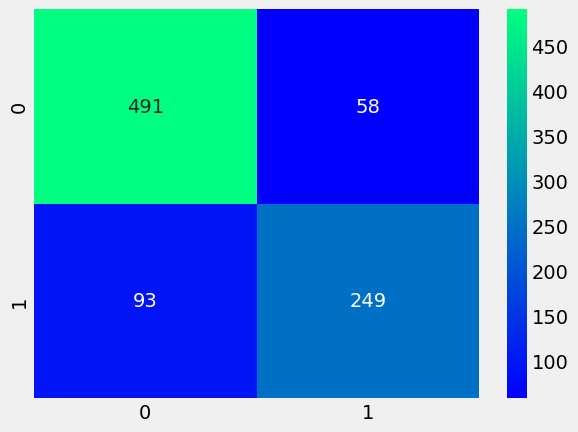

In [102]:
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.05)
result = cross_val_predict(ada, X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, result), cmap='winter', annot=True, fmt='2.0f')
plt.show()

## 4) Important Features Extraction

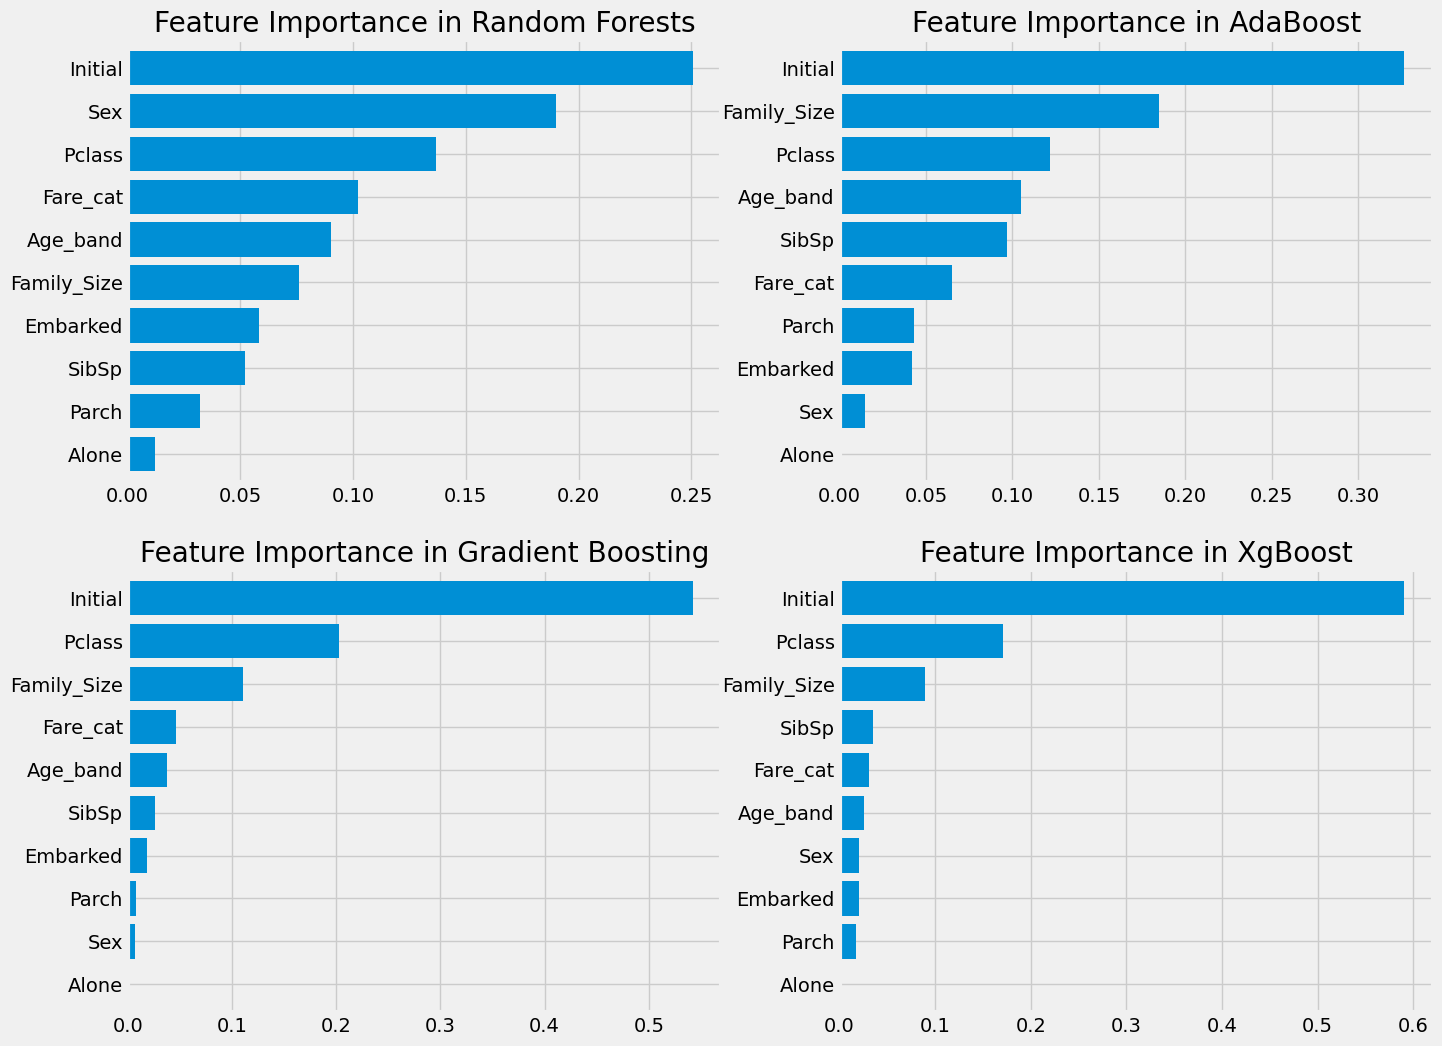

In [103]:
f, ax = plt.subplots(2, 2, figsize=(15,12))

model = RandomForestClassifier(n_estimators=500, random_state=0)
model.fit(X,Y)

pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')

model = AdaBoostClassifier(n_estimators=600, learning_rate=0.05, random_state=0)
model.fit(X,Y)

pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,1])
ax[0,1].set_title('Feature Importance in AdaBoost')

model = GradientBoostingClassifier(n_estimators=100, learning_rate=1, random_state=0)
model.fit(X,Y)

pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,0])
ax[1,0].set_title('Feature Importance in Gradient Boosting')

model = xg.XGBClassifier(n_estimators=200, learning_rate=0.05)
model.fit(X,Y)

pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,1])
ax[1,1].set_title('Feature Importance in XgBoost')

plt.show()